## 2. Получение предсказаний на тестовой выборке и создание файла для kaggle.

Считаем данные из яндекс-диска

In [113]:
import os
import pandas as pd
path = r'C:\Users\AKorn\Downloads\kaggle_data (1)\kaggle_data' 
data = {}

Data = []
Target = []

i=0
for dir_entry in sorted(os.listdir(path)):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            print(dir_entry_path.split("\\")[-1])
            try:
                df = pd.read_csv(my_file, delimiter=';')
                if df.shape[1] == 5:
                    Data.append(df)
                    Target.append(dir_entry_path.split("\\")[-1])
            except UnicodeDecodeError:
                pass

for dir_entry in sorted(os.listdir(path)):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            print(dir_entry_path.split("\\")[-1])
            try:
                df = pd.read_csv(my_file, delimiter=',')
                if df.shape[1] == 5:
                    Data.append(df)
                    Target.append(dir_entry_path.split("\\")[-1])
            except UnicodeDecodeError:
                pass

track_0.csv
track_1.csv
track_10.csv
track_100.csv
track_101.csv
track_102.csv
track_103.csv
track_104.csv
track_105.csv
track_106.csv
track_107.csv
track_108.csv
track_109.csv
track_11.csv
track_110.csv
track_111.csv
track_112.csv
track_113.csv
track_114.csv
track_115.csv
track_116.csv
track_117.csv
track_118.csv
track_119.csv
track_12.csv
track_120.csv
track_121.csv
track_122.csv
track_123.csv
track_124.csv
track_125.csv
track_126.csv
track_127.csv
track_128.csv
track_129.csv
track_13.csv
track_130.csv
track_131.csv
track_132.csv
track_133.csv
track_134.csv
track_135.csv
track_136.csv
track_137.csv
track_138.csv
track_139.csv
track_14.csv
track_140.csv
track_141.csv
track_142.csv
track_143.csv
track_144.csv
track_145.csv
track_15.csv
track_16.csv
track_17.csv
track_18.csv
track_19.csv
track_2.csv
track_20.csv
track_21.csv
track_22.csv
track_23.csv
track_24.csv
track_25.csv
track_26.csv
track_27.csv
track_28.csv
track_29.csv
track_3.csv
track_30.csv
track_31.csv
track_32.csv
track_33.

Переведём типы движений в числа

In [114]:
classes = {'тояни' : 0, 'месте' : 0, 'одьб' : 1, 'аг' : 1, 'ег' : 2, 'елоси' : 3, 'естн' : 4, 'одъ' : 4, 
           'втомо' : 5, 'ашин' : 5, 'метро' : 6, 'лектро' : 7, 'амок' : 8}

answers = {'стояние' : 0, 'ходьба' : 1, 'бег' : 2, 'велосипед' : 3, 'лестница' : 4, 
           'автомобиль' : 5, 'метро' : 6, 'электросамокат' : 7, 'самокат' : 8}

# стояние, ходьба, велосипед, лестница, бег, подъем, подъём, автомобиль, электросамокат, машина, метро

In [115]:
def get_action(name):
    for act in classes:
        if name.lower().find(act) != -1:
            return classes[act]
    return -1

In [116]:
def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / numpy.linalg.norm(vec1)).reshape(3), (vec2 / numpy.linalg.norm(vec2)).reshape(3)
    v = numpy.cross(a, b)
    if any(v): #if not all zeros then 
        c = numpy.dot(a, b)
        s = numpy.linalg.norm(v)
        kmat = numpy.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
        return numpy.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))

    else:
        return numpy.eye(3) #cross of all zeros only occurs on identical directions

In [117]:
def rotate(X, Y, Z, Mat):
    new_x = []
    new_y = []
    new_z = []
    
    for elem in zip(X,Y,Z):
        res = Mat.dot(elem)
        new_x.append(res[0])
        new_y.append(res[1])
        new_z.append(res[2])
        
    return new_x, new_y, new_z

In [118]:
def integrate(lst):
    res = []
    s = 0
    for elem in lst:
        s += elem
        res.append(s)
    return res

Обработаем данные и извлечём признаки для создания модели

Populating the interactive namespace from numpy and matplotlib
track_0.csv
track_0.csv
New means: -9.329605248950896e-18 -6.50739966114325e-17 0.9875143590268685
track_0.csv Амплитуда: 2.617663370775875 max FFT: 0.09876217467606192
track_1.csv
track_1.csv
New means: 9.217139958898682e-17 9.405244856019063e-19 1.0103744189559642
track_1.csv Амплитуда: 1.9935598883036225 max FFT: 0.0645067017539682
track_10.csv
track_10.csv
New means: 8.222288166944265e-17 -5.1389301043401653e-17 1.0623229019882559
track_10.csv Амплитуда: 8.833789142567072 max FFT: 0.4530374478269788
track_100.csv
track_100.csv
New means: 3.0988997448891288e-18 -7.987840079064911e-17 1.027493348428035
track_100.csv Амплитуда: 0.34113272676839523 max FFT: 0.00015632447060523778
track_101.csv
track_101.csv
New means: -1.555819434552442e-18 -8.090261059672697e-17 1.00859695714608
track_101.csv Амплитуда: 0.4600241423037703 max FFT: 0.005697739935863903
track_102.csv
track_102.csv
New means: 0.0 1.3717041230889965e-18 0.9890

<ipython-input-124-8a62bf21f43b>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,10))


New means: 1.9387250634654848e-17 -5.816175190396454e-17 1.0193638092620647
track_116.csv Амплитуда: 2.933115416840867 max FFT: 0.1255485824269046
track_117.csv
track_117.csv
New means: 4.6534018565817383e-17 1.1845022907662607e-16 0.9090110827984701
track_117.csv Амплитуда: 1.938560304416 max FFT: 0.006183399690139251
track_118.csv
track_118.csv
New means: -2.6068129718661958e-17 -4.7667437199839004e-17 0.9919218252474441
track_118.csv Амплитуда: 1.8007366176688933 max FFT: 0.03630958202364504
track_119.csv
track_119.csv
New means: 0.0 0.0 0.5665868414613874
track_119.csv Амплитуда: 2.4565741360291082 max FFT: 0.030066341084841137
track_12.csv
track_12.csv
New means: -2.478637450325931e-17 1.242761277177307e-16 1.0360003295997127
track_12.csv Амплитуда: 4.364114709035295 max FFT: 0.39980148705018065
track_120.csv
track_120.csv
New means: -1.3459018961544609e-17 0.0 1.0150661096763416
track_120.csv Амплитуда: 9.491298391484909 max FFT: 0.28731622530907985
track_121.csv
track_121.csv
Ne

<ipython-input-124-8a62bf21f43b>:45: RuntimeWarning: Mean of empty slice.
  mx = df.iloc[st:end]['gFx'].values.mean()
<ipython-input-124-8a62bf21f43b>:46: RuntimeWarning: Mean of empty slice.
  my = df.iloc[st:end]['gFy'].values.mean()
<ipython-input-124-8a62bf21f43b>:47: RuntimeWarning: Mean of empty slice.
  mz = df.iloc[st:end]['gFz'].values.mean()
C:\Users\AKorn\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


ValueError: Invalid number of FFT data points (0) specified.

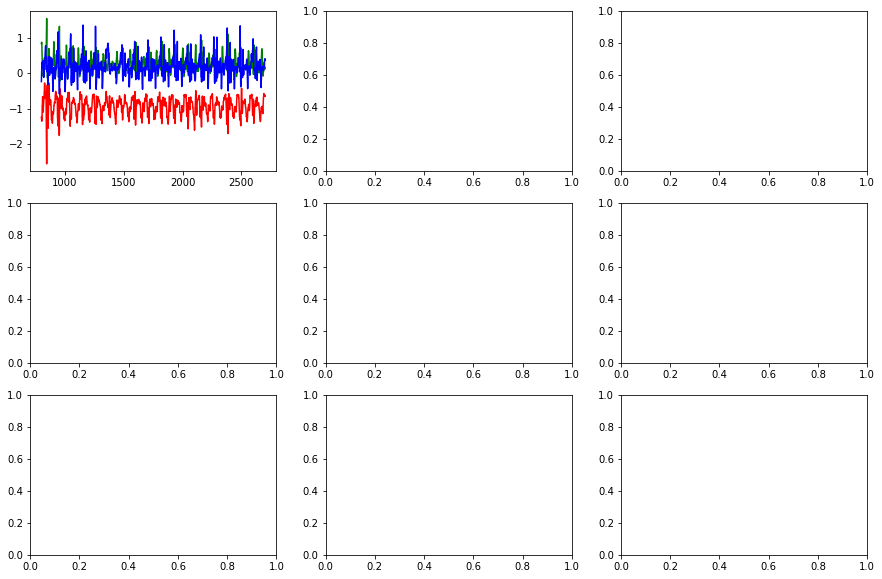

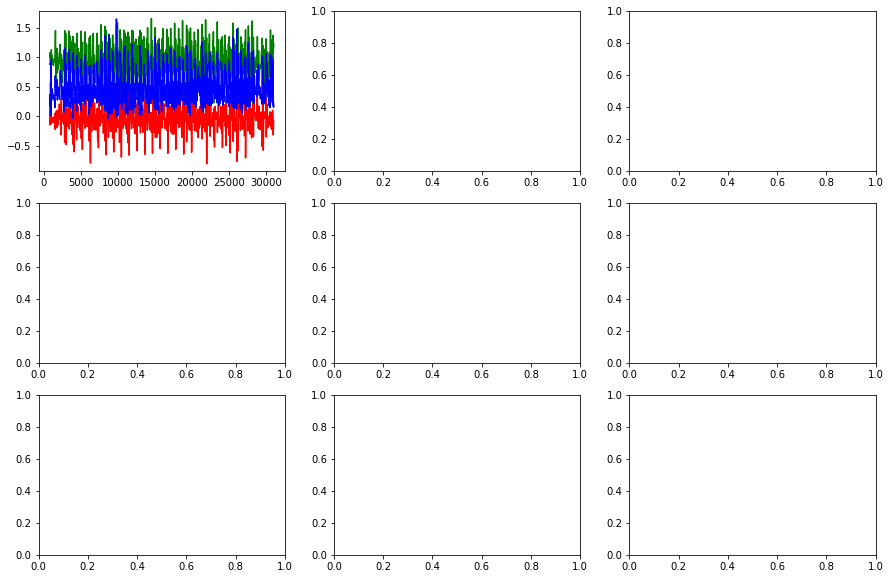

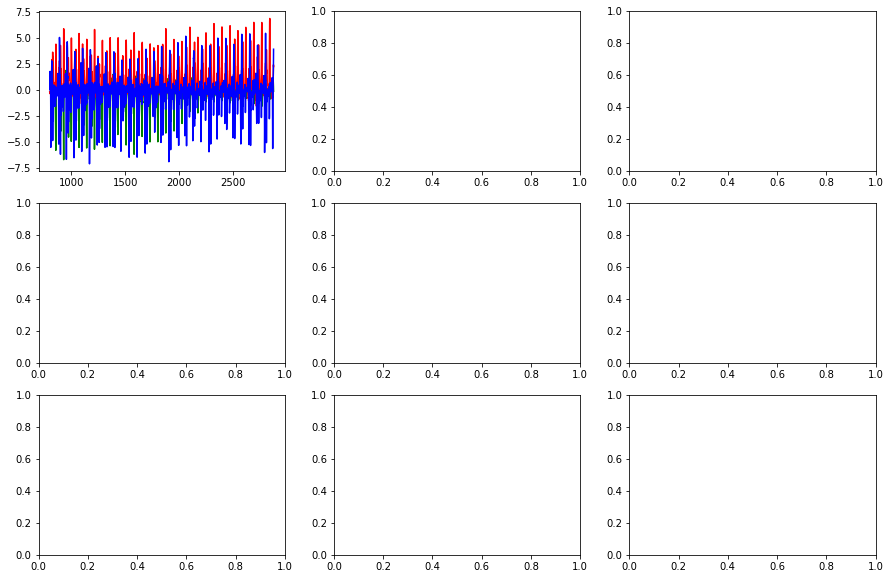

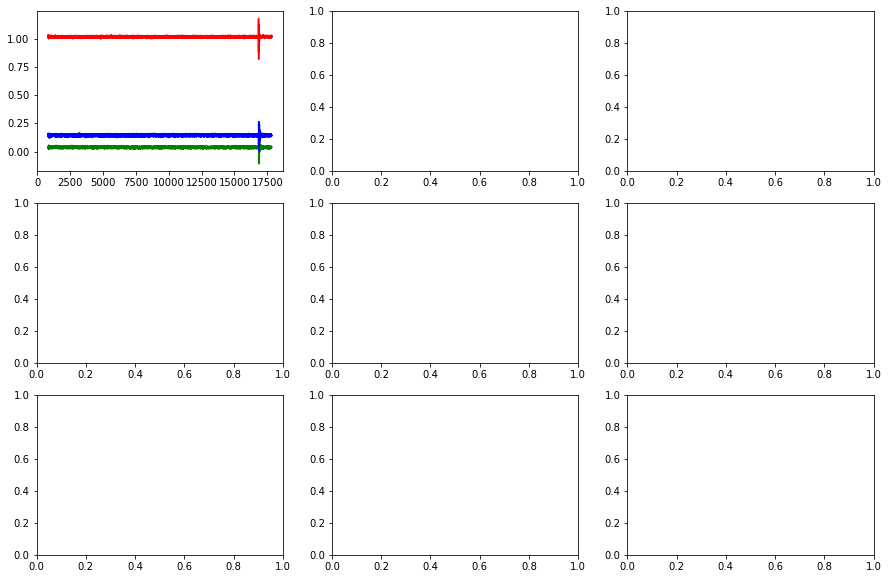

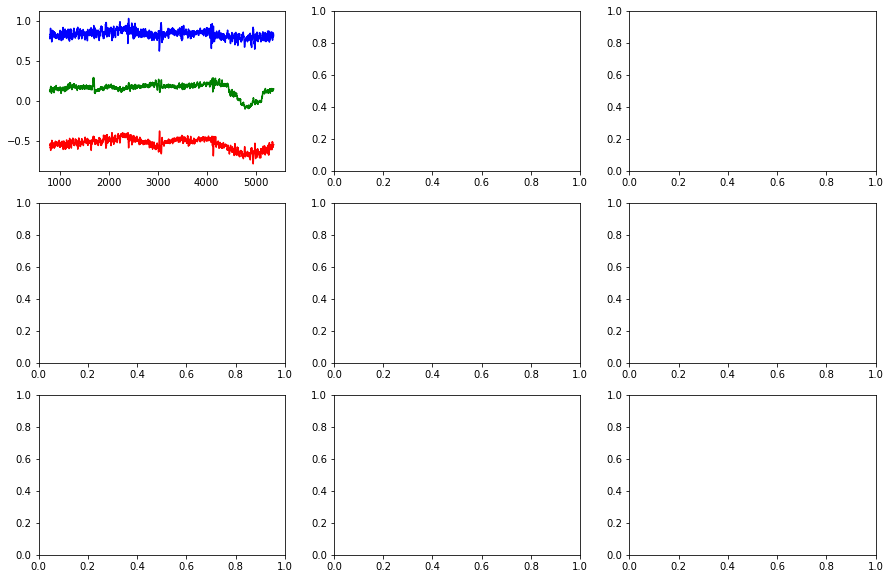

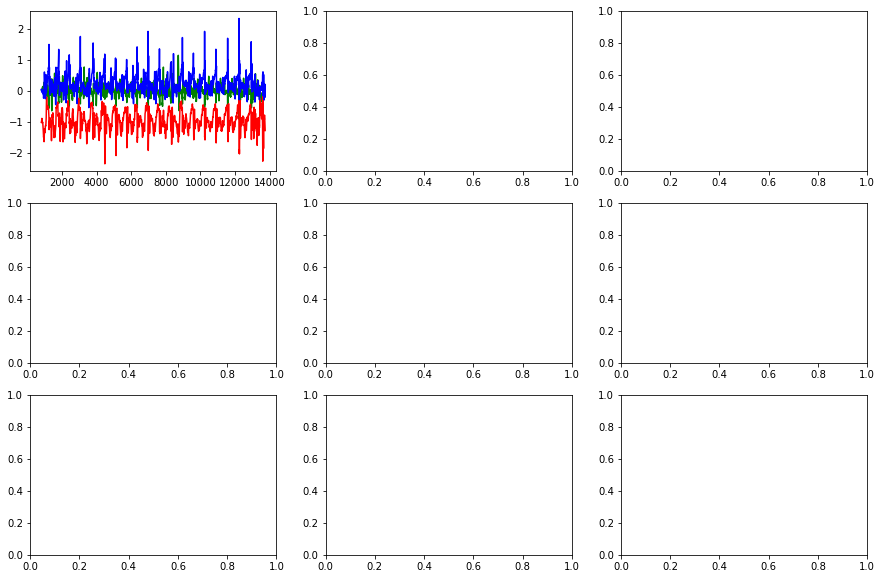

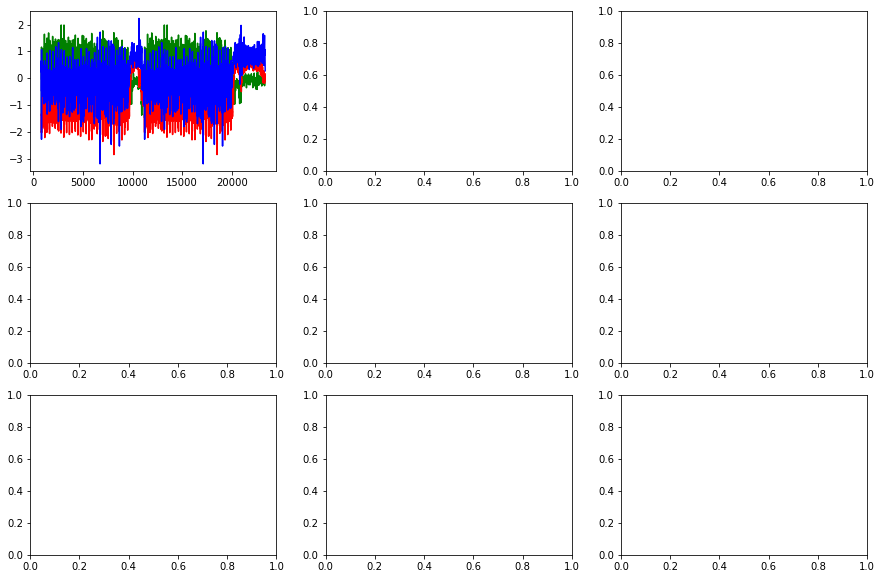

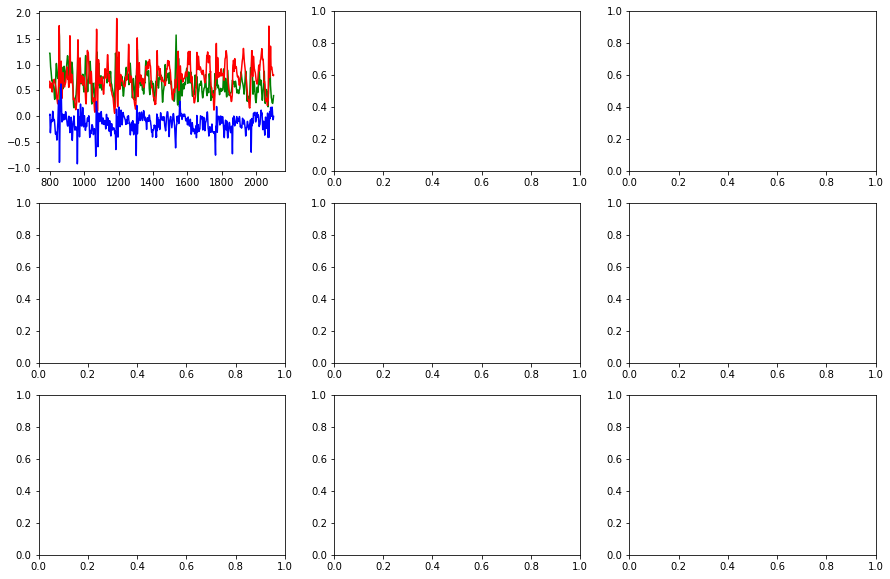

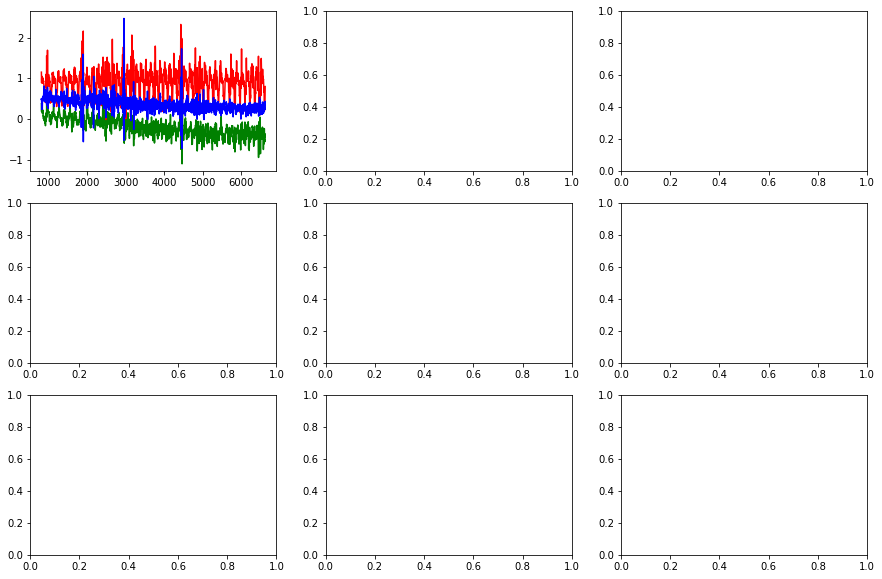

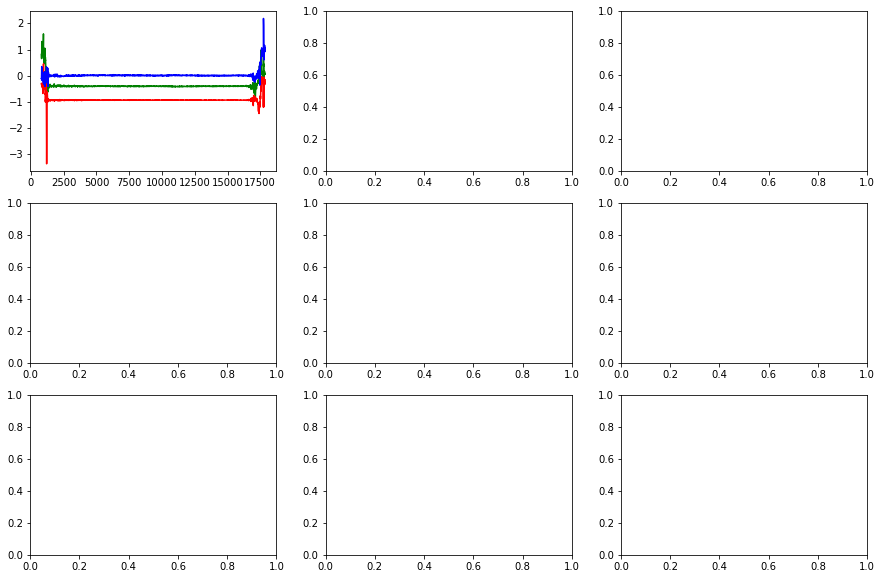

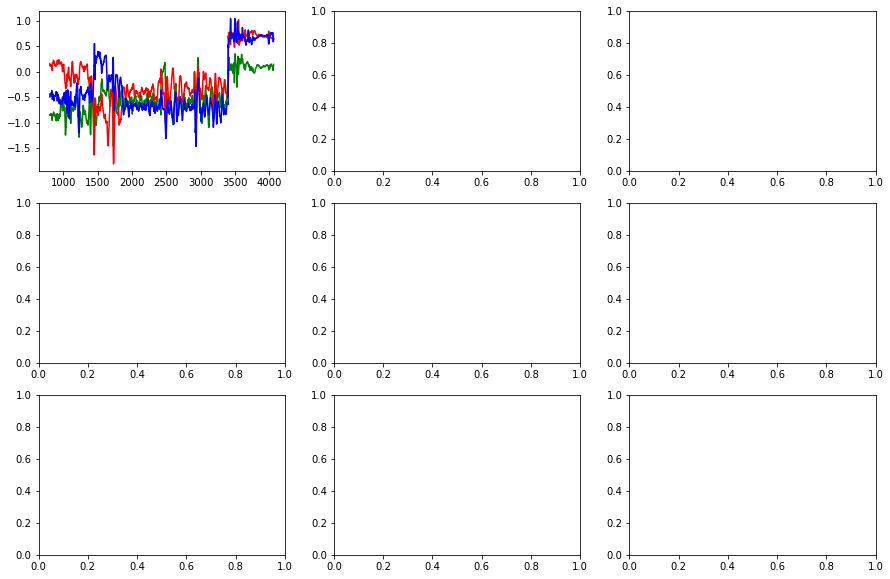

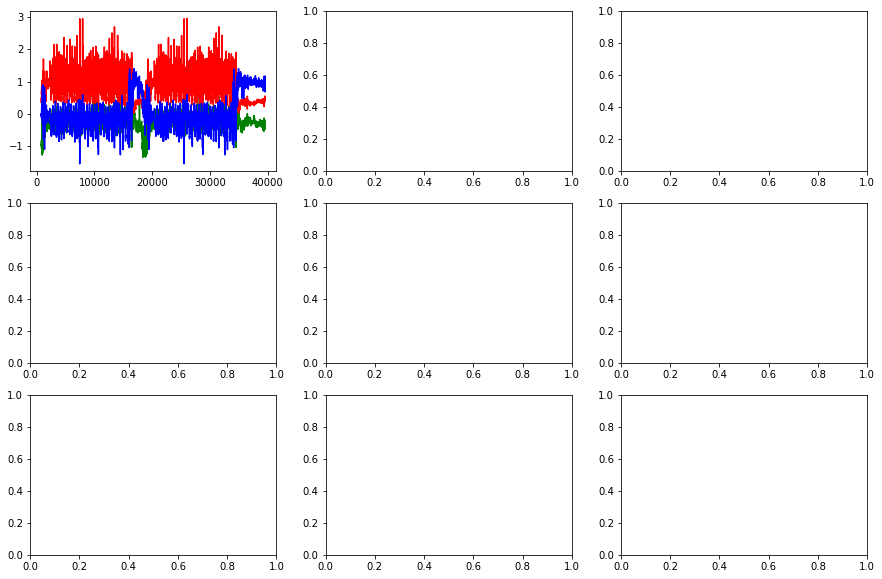

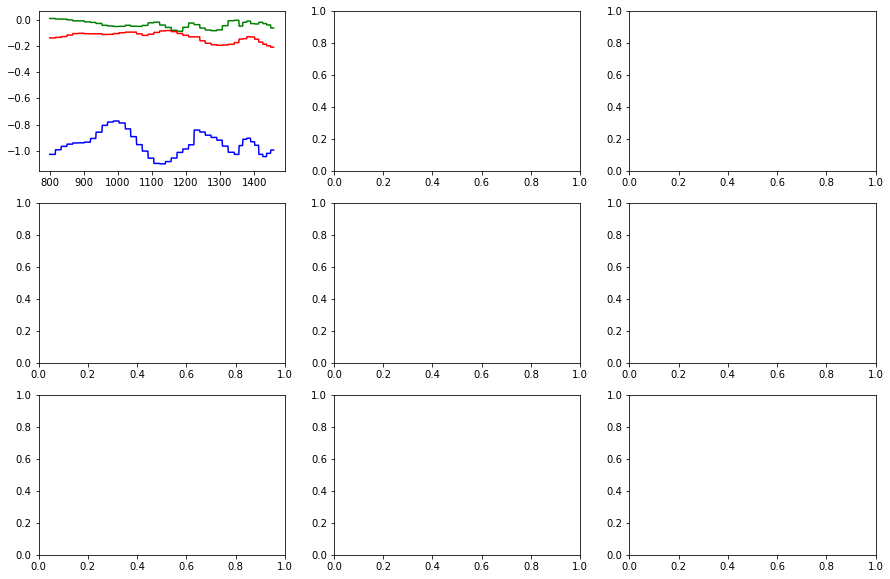

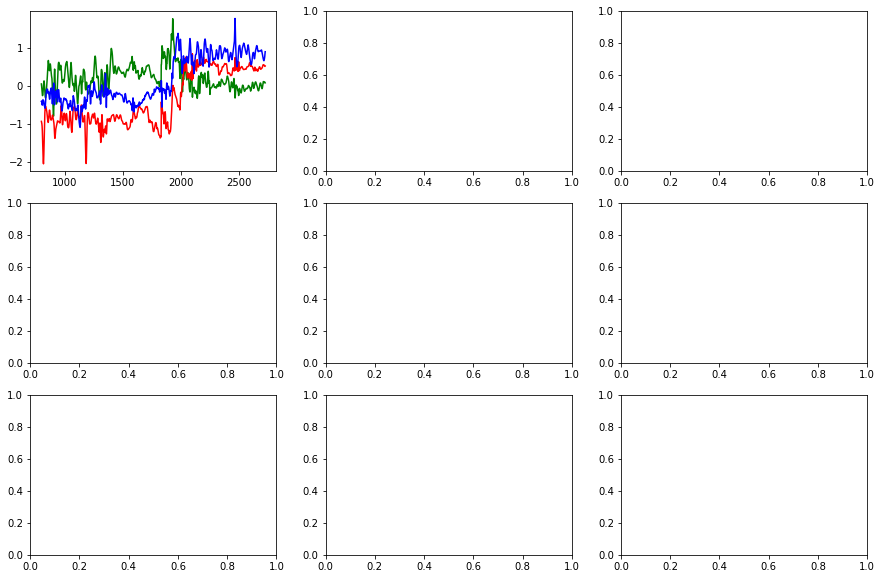

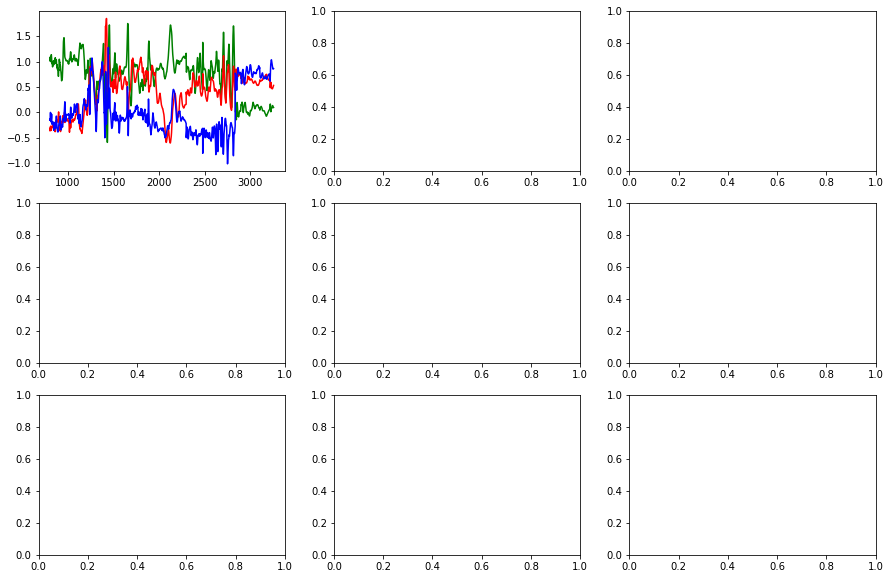

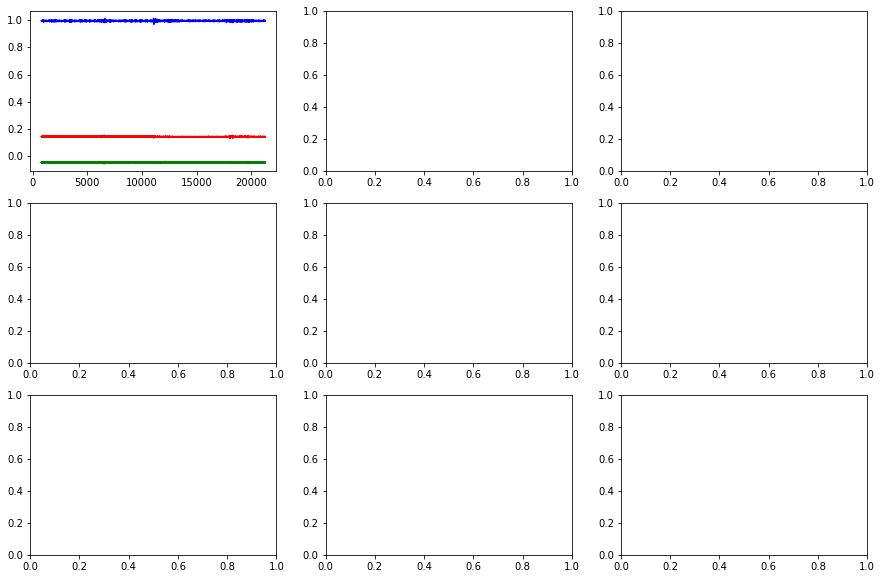

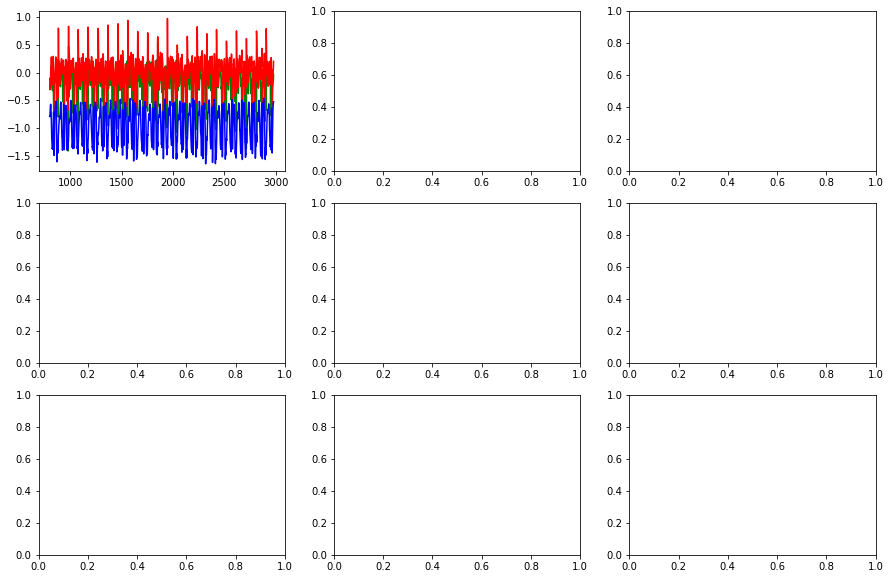

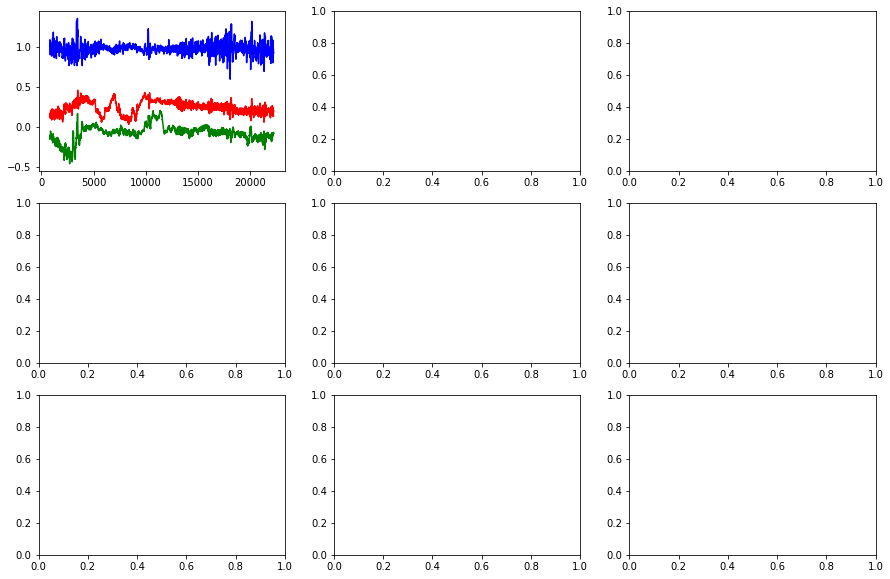

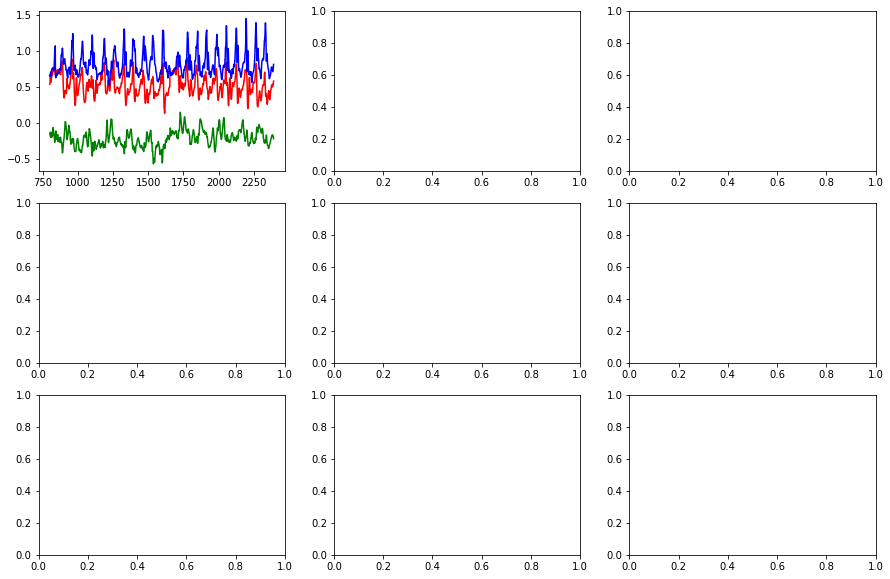

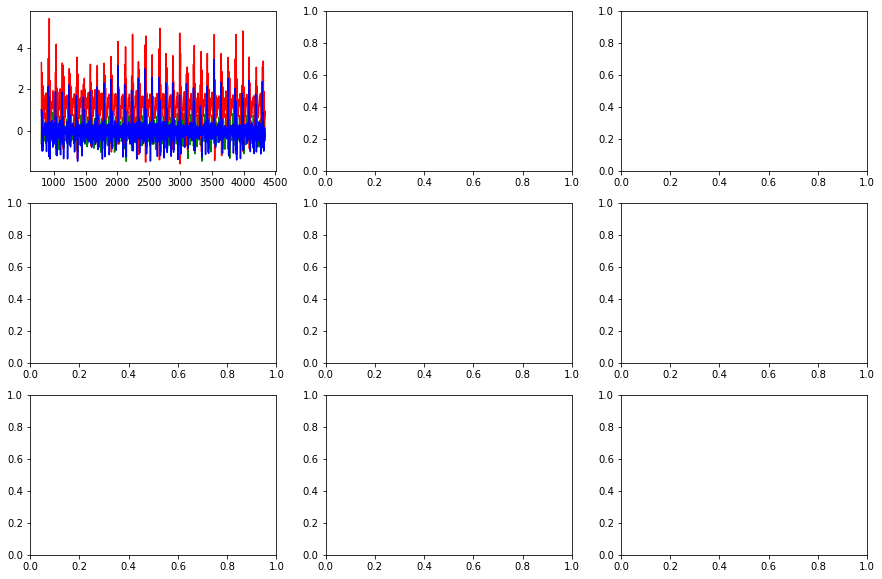

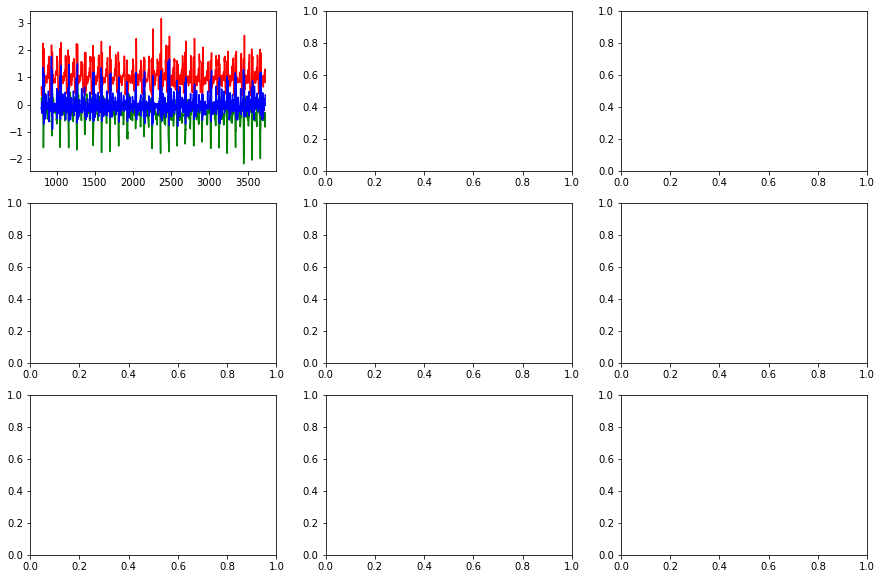

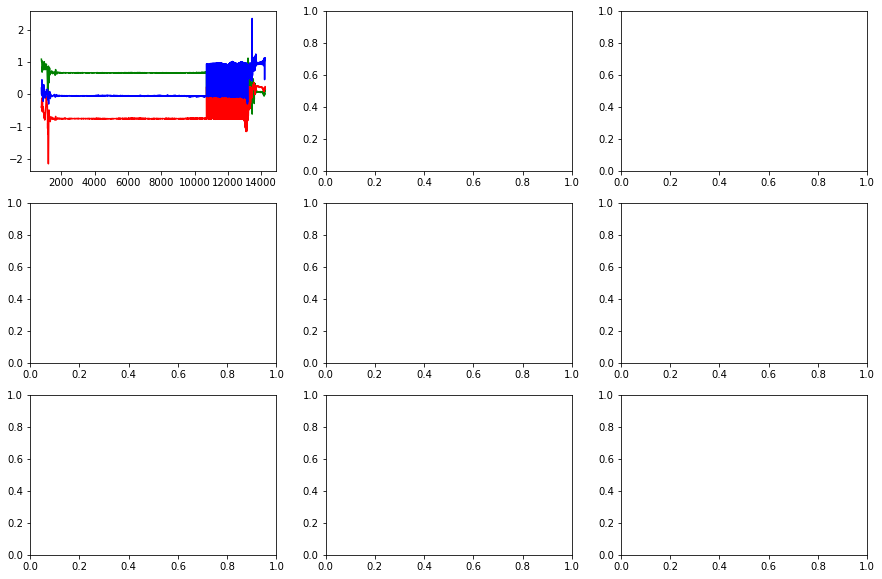

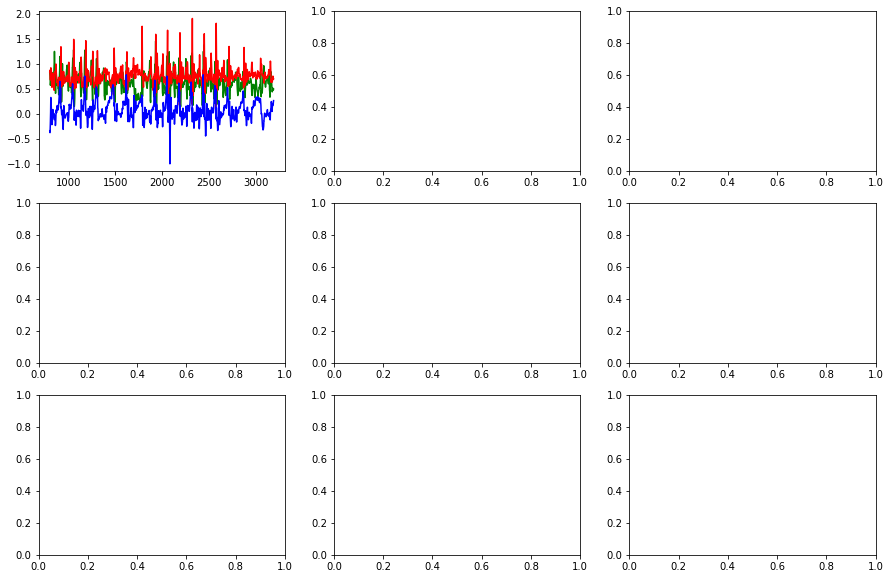

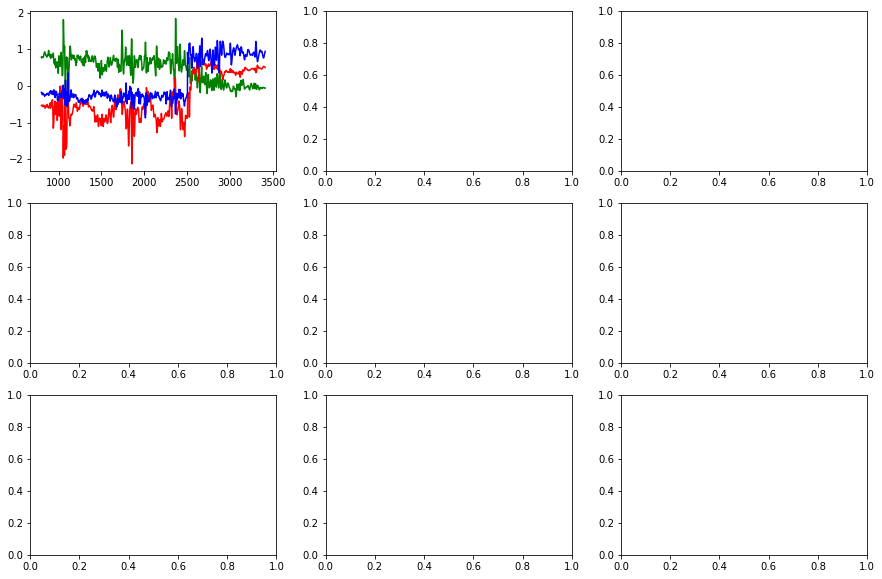

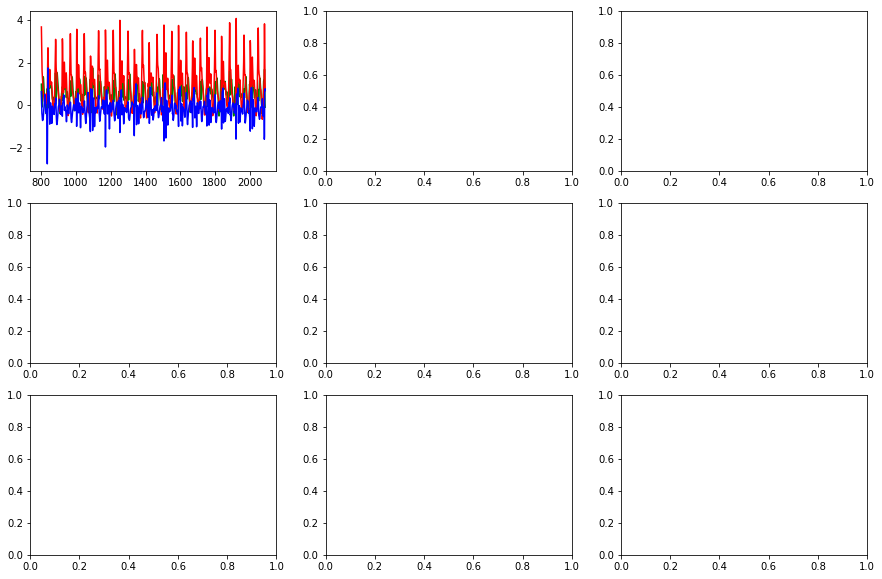

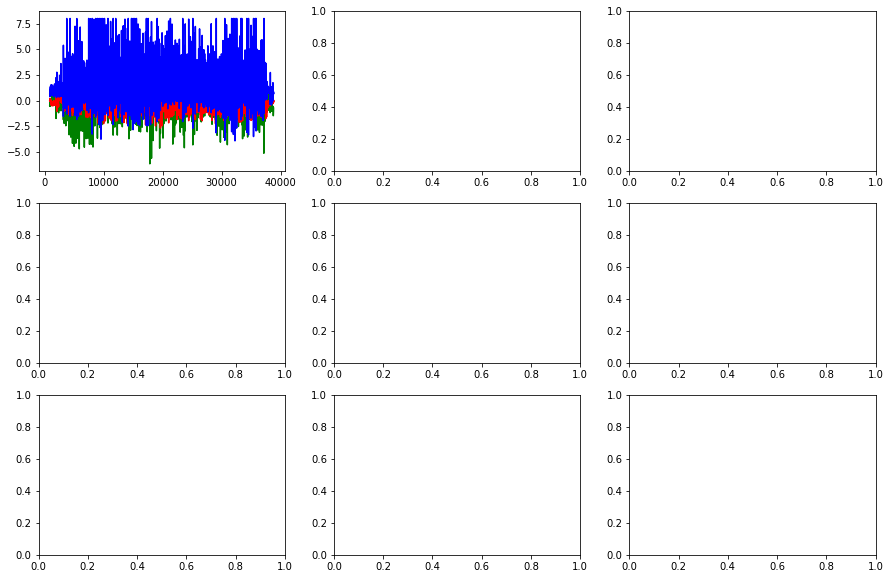

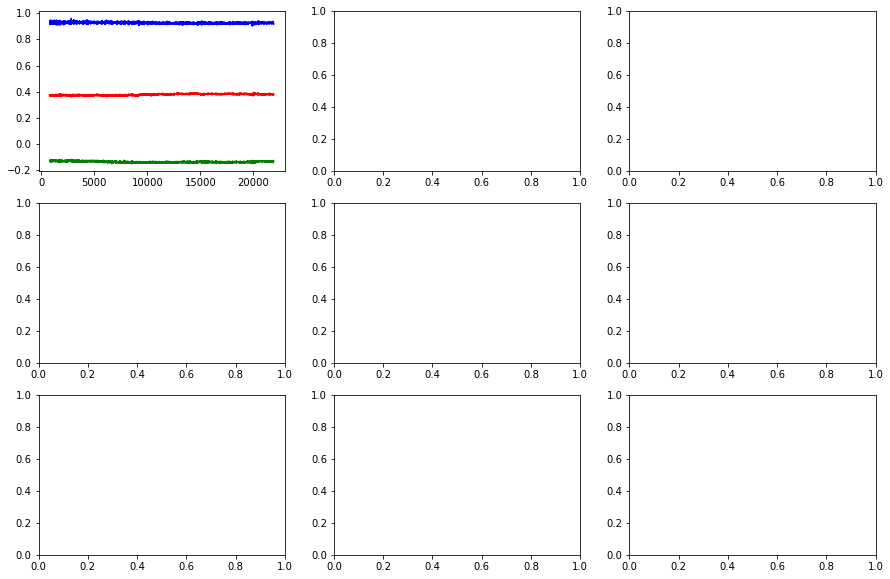

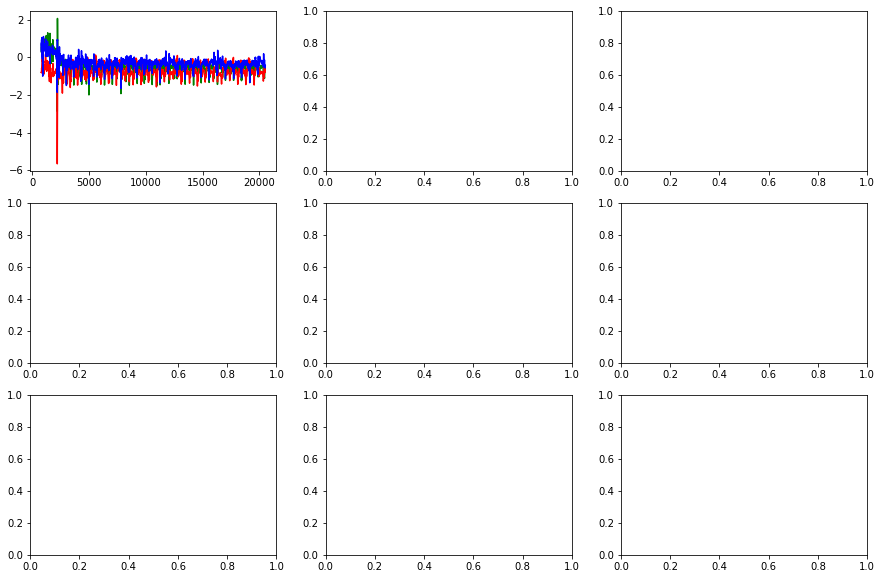

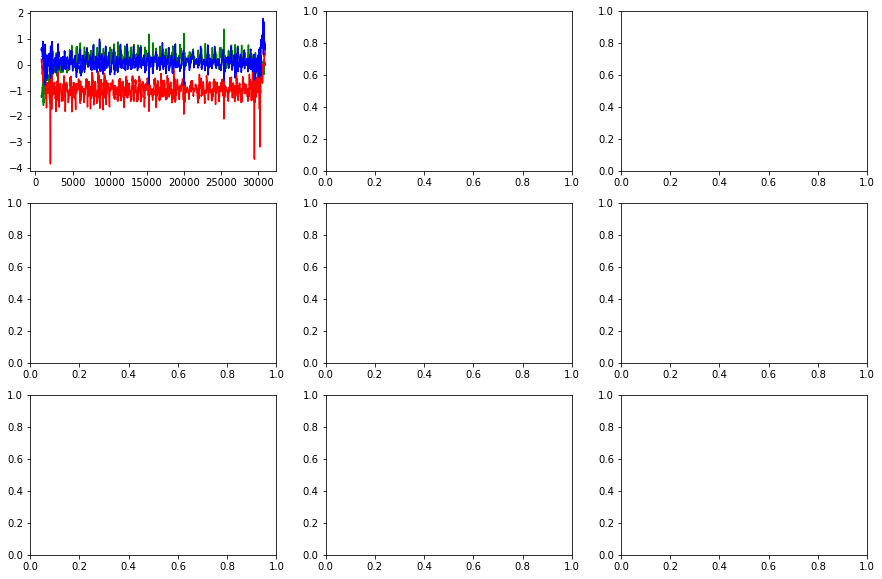

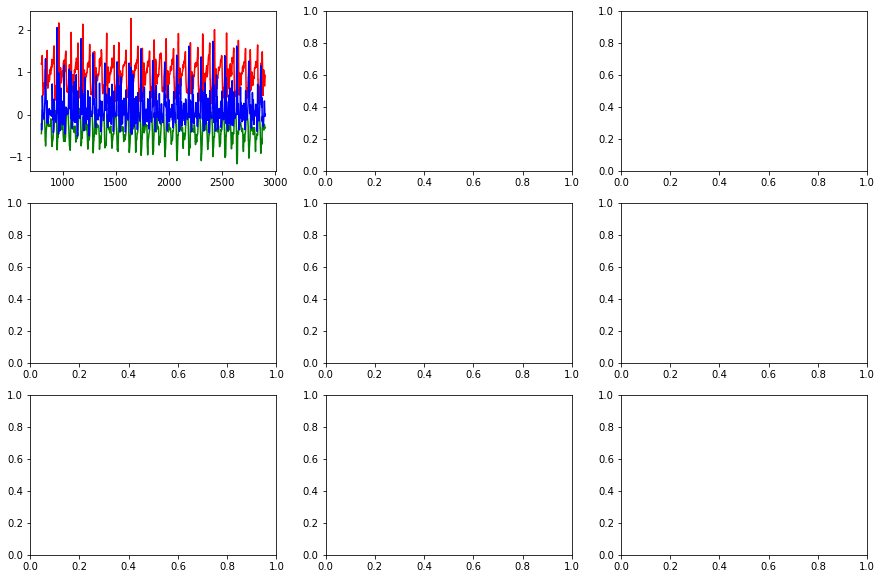

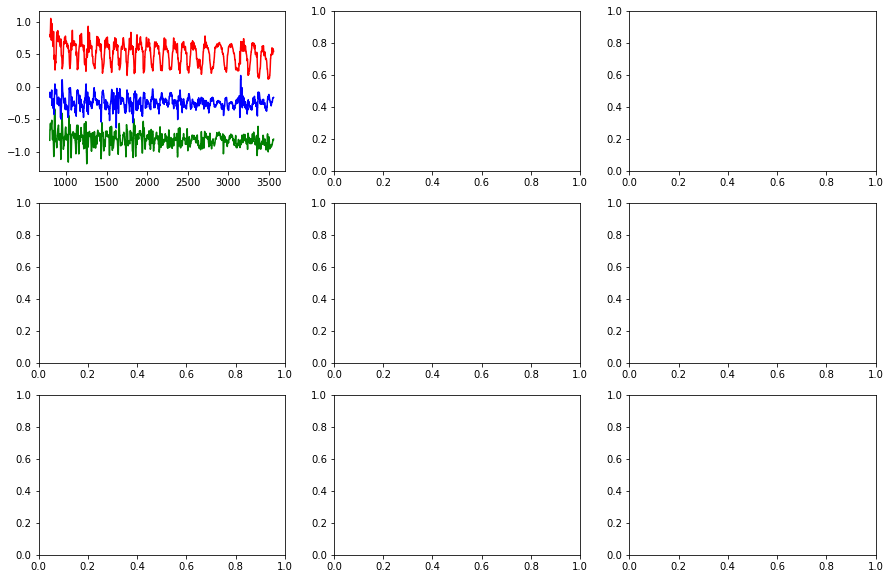

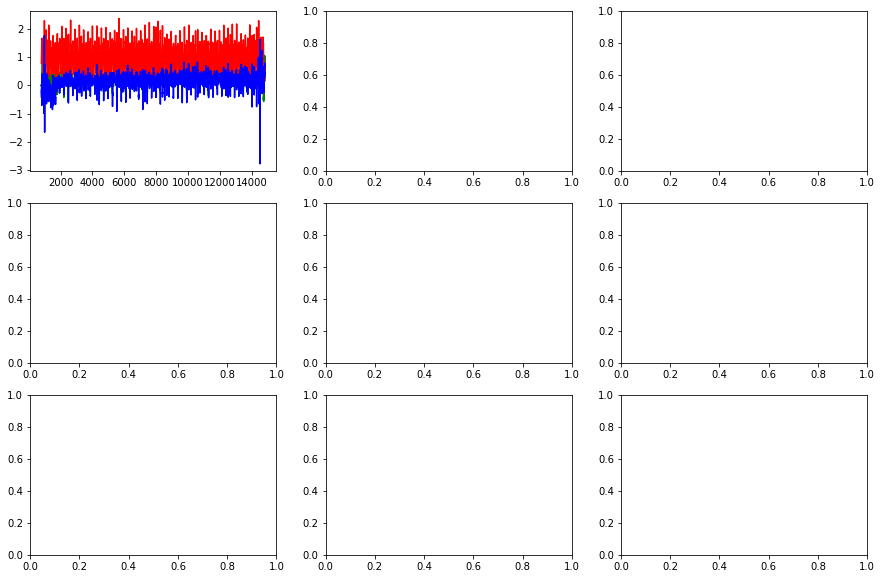

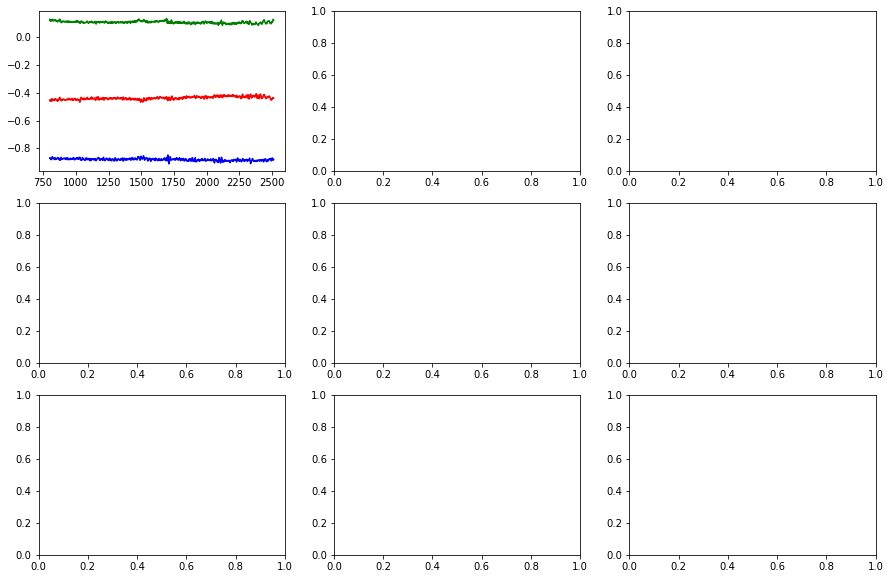

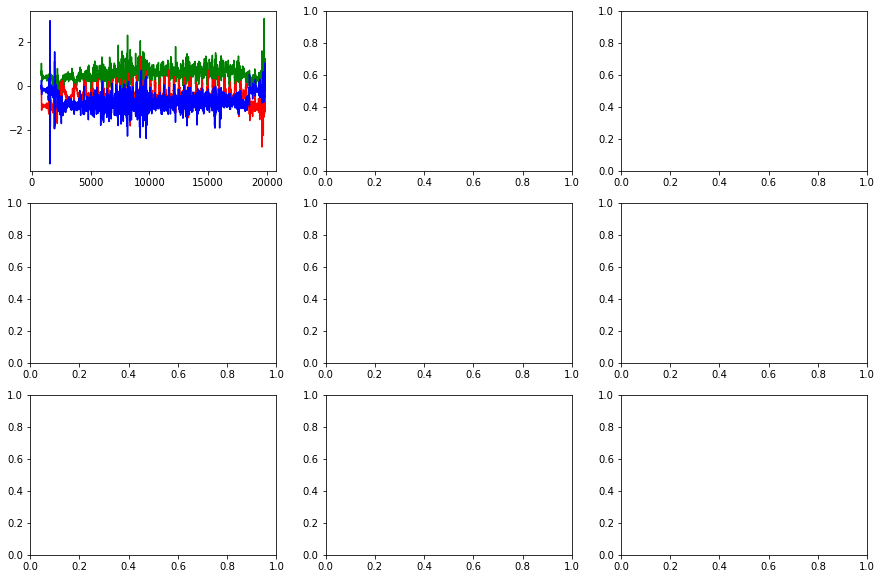

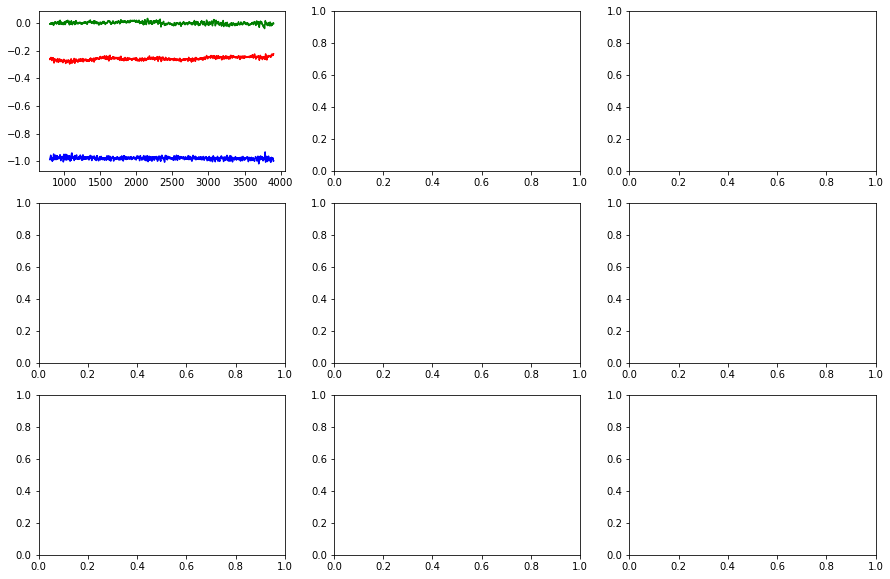

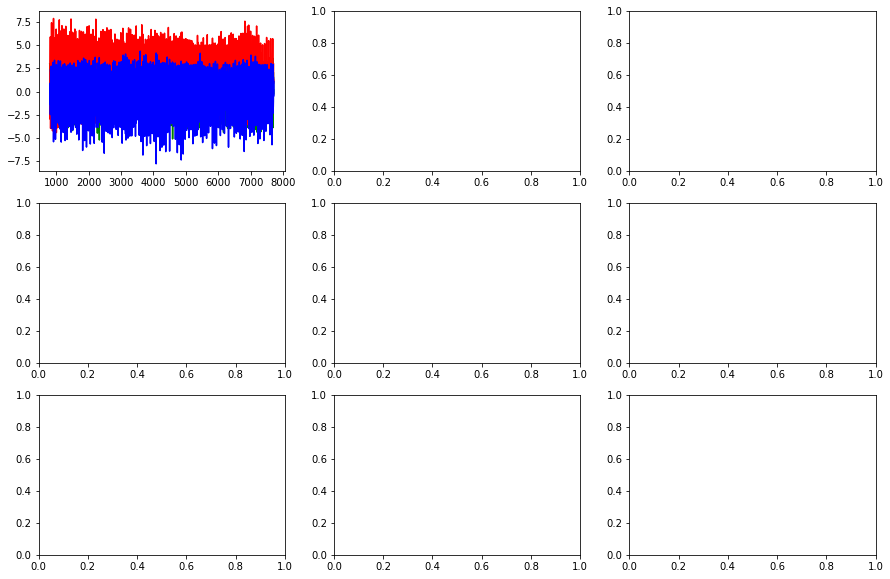

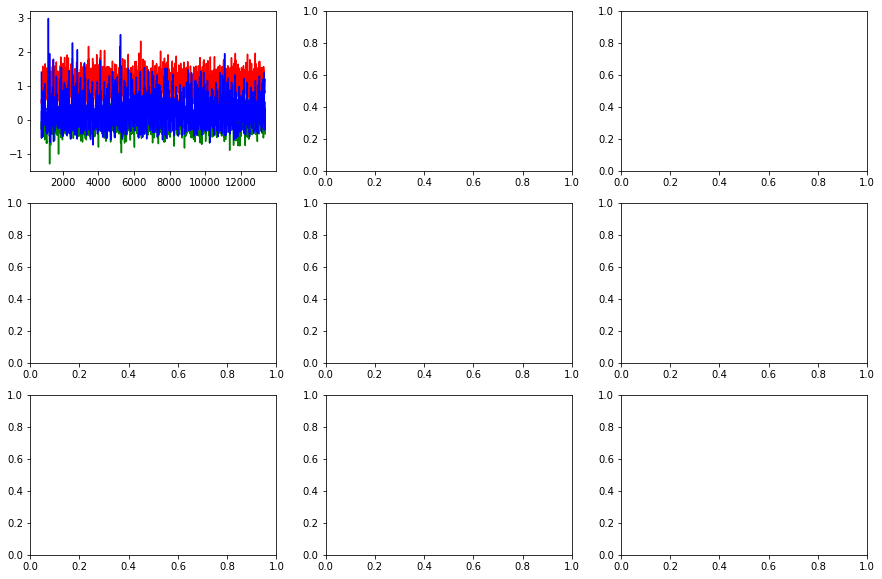

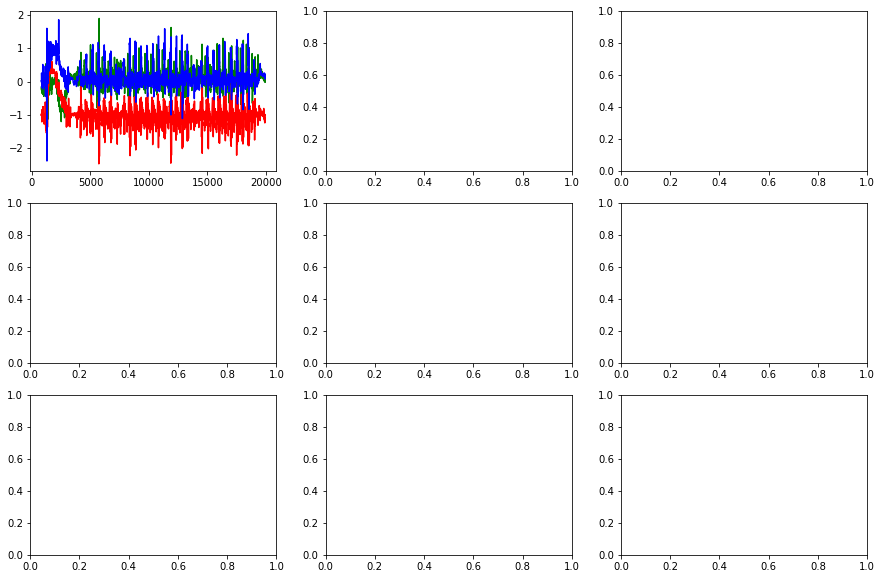

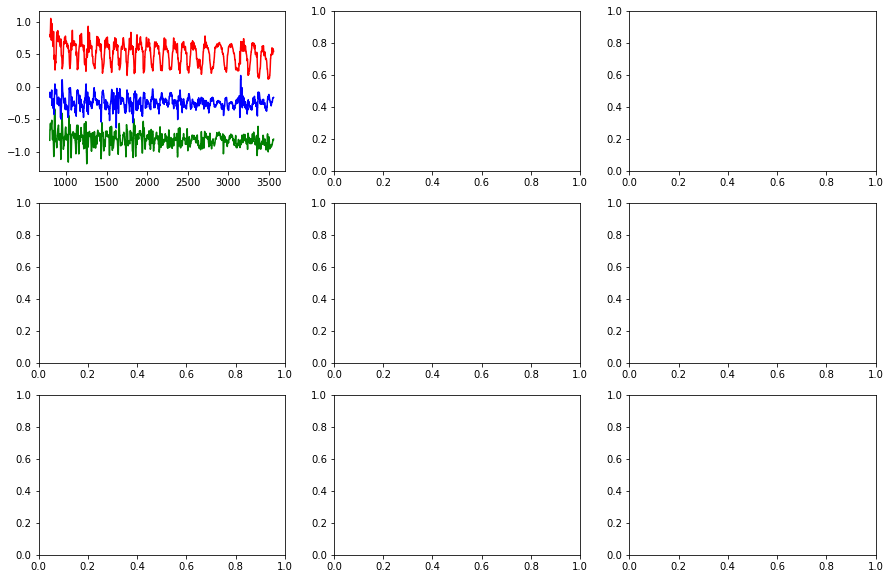

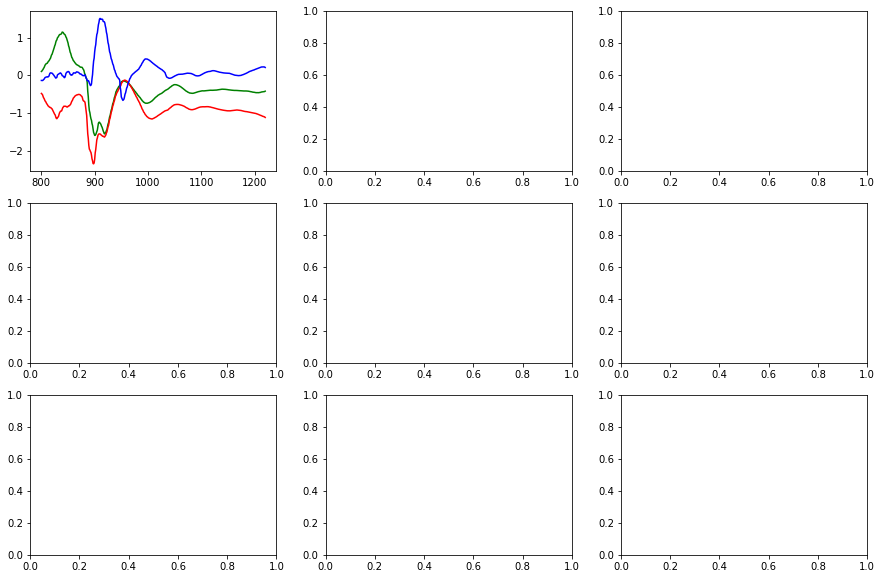

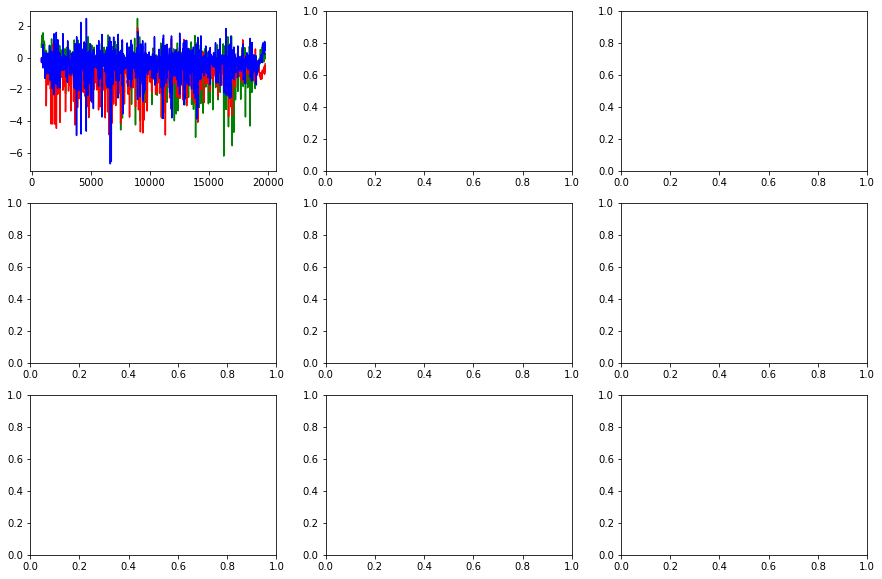

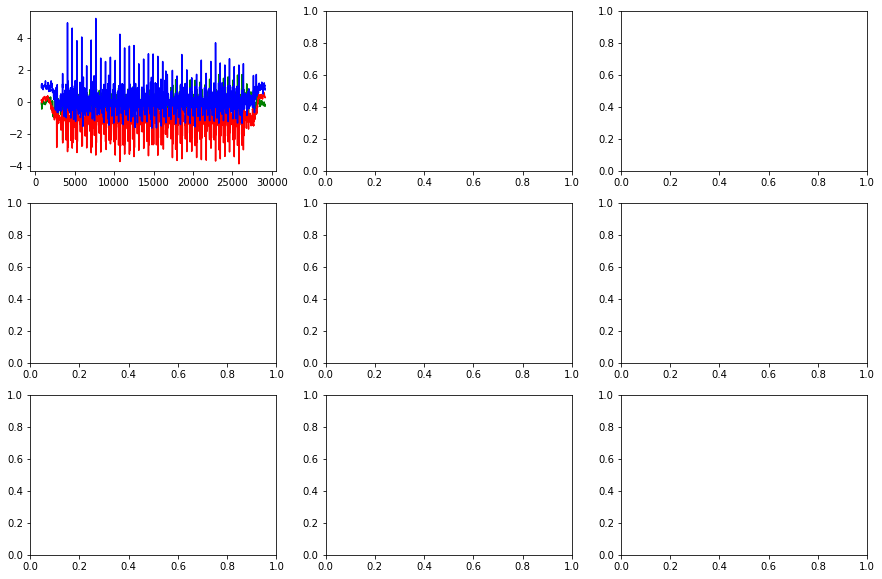

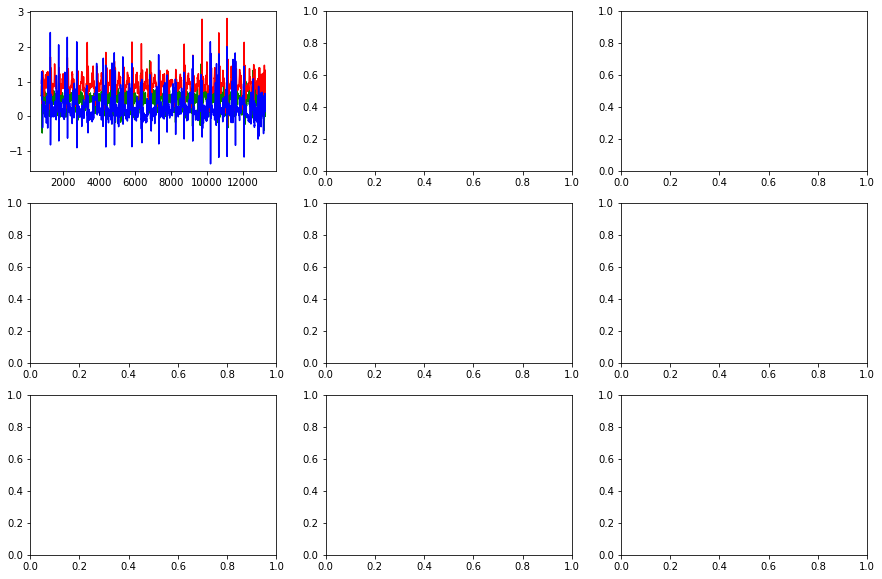

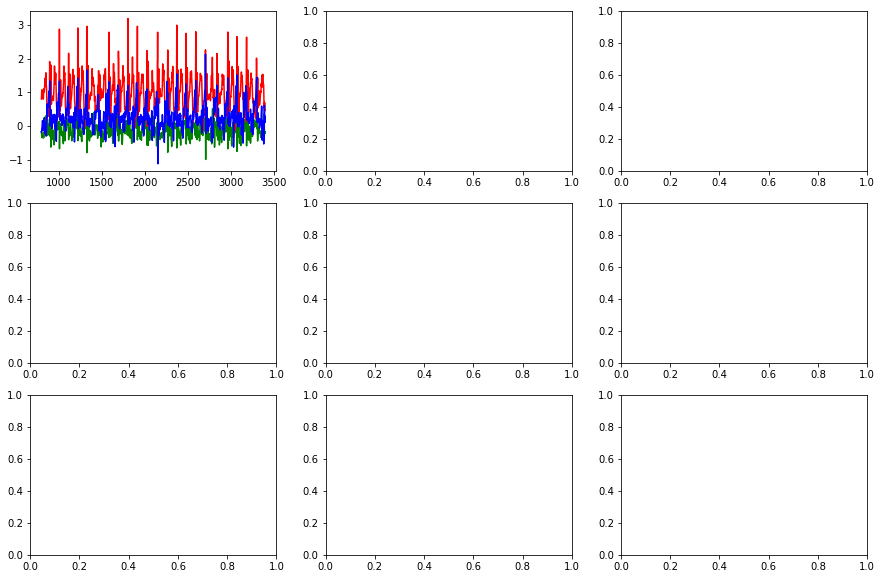

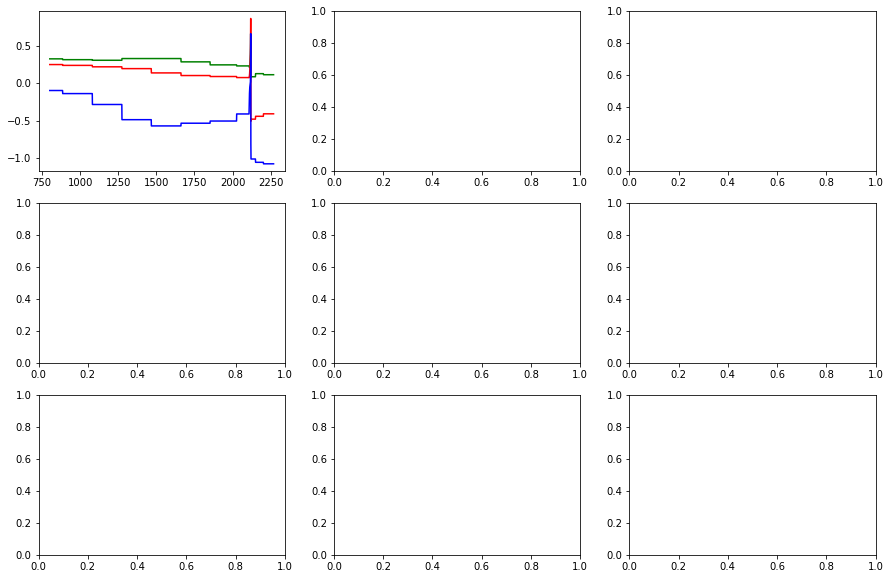

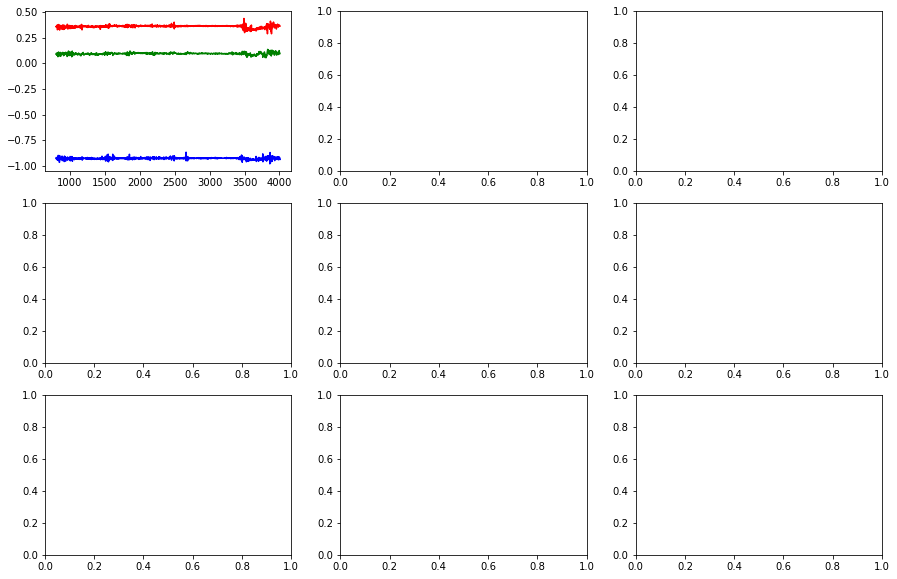

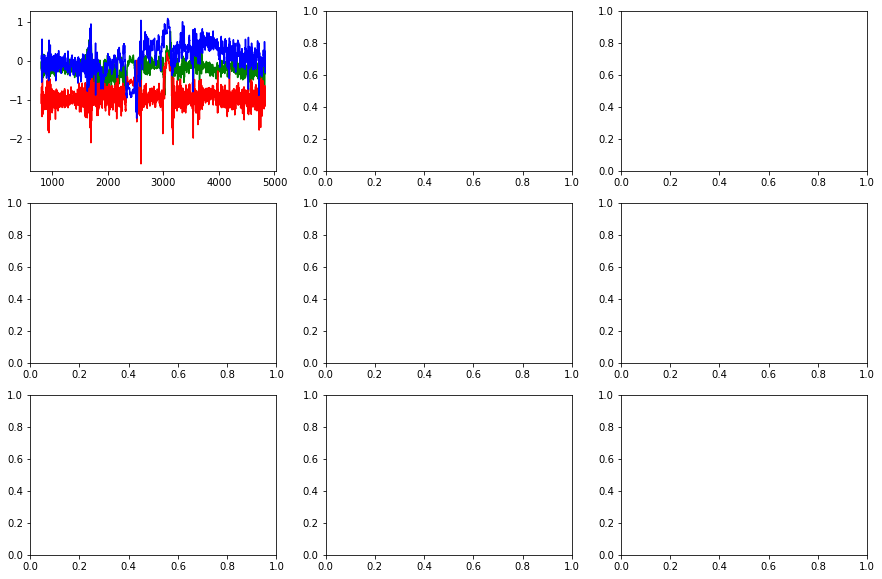

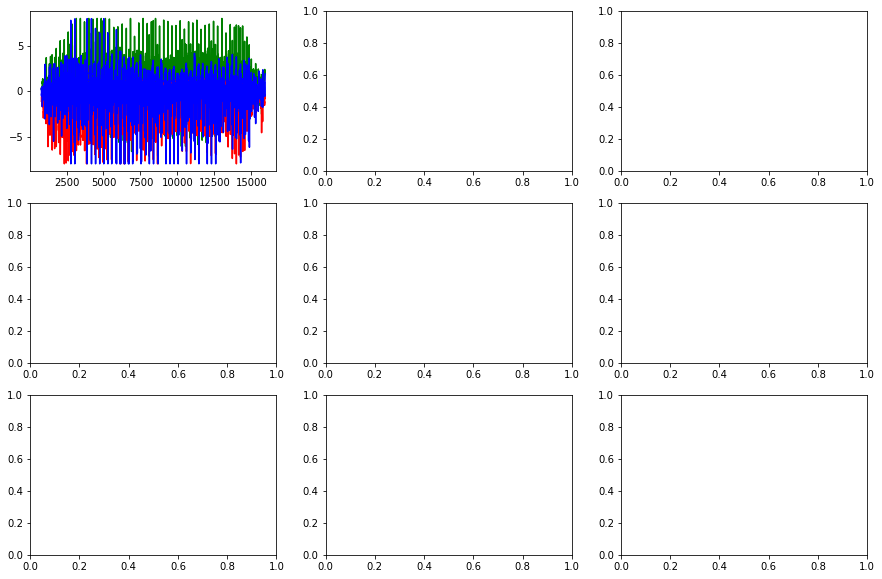

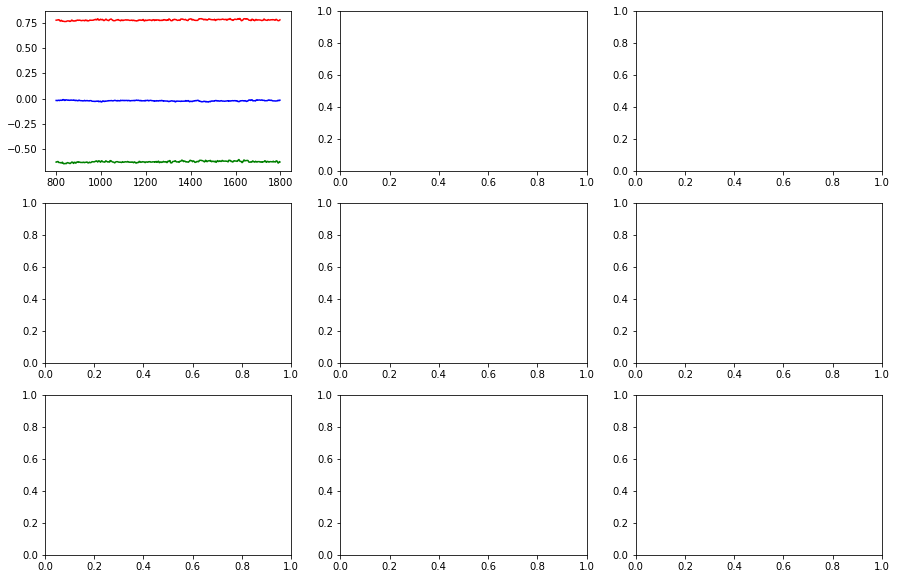

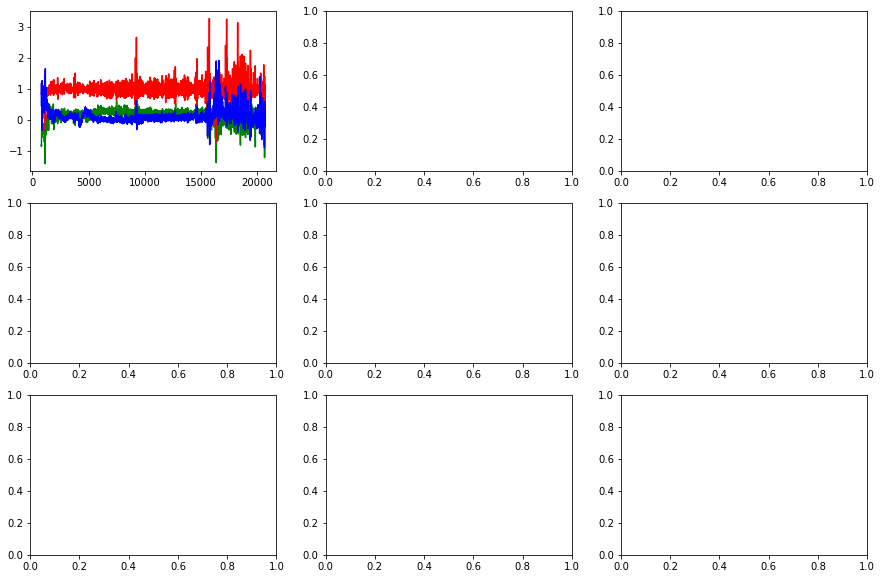

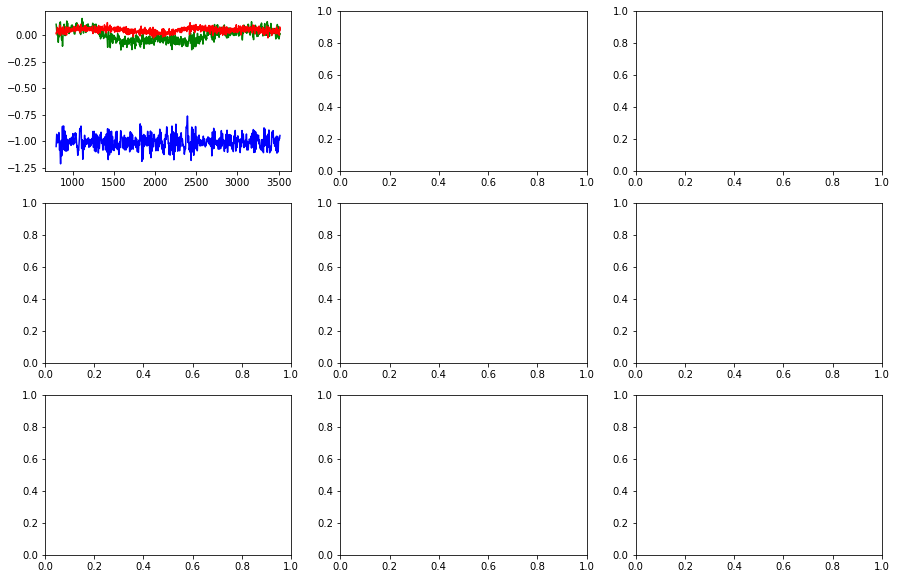

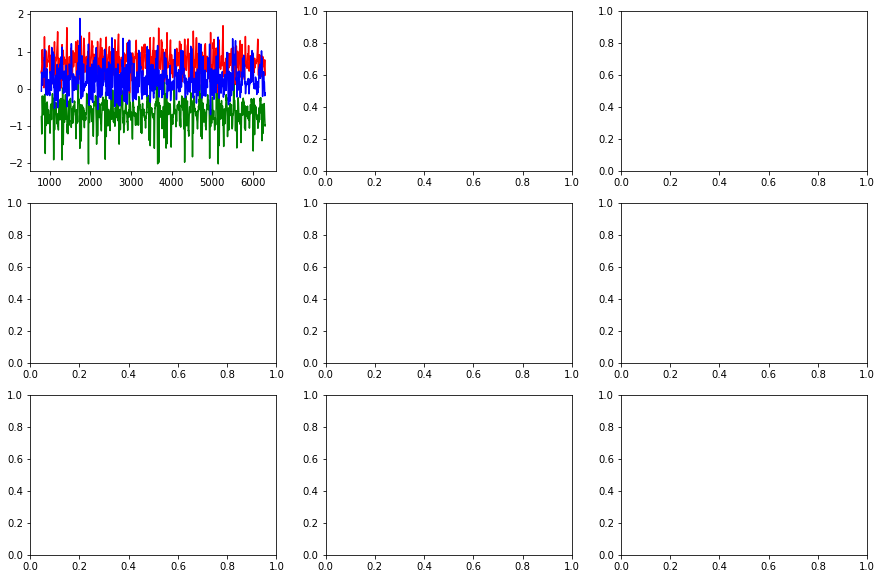

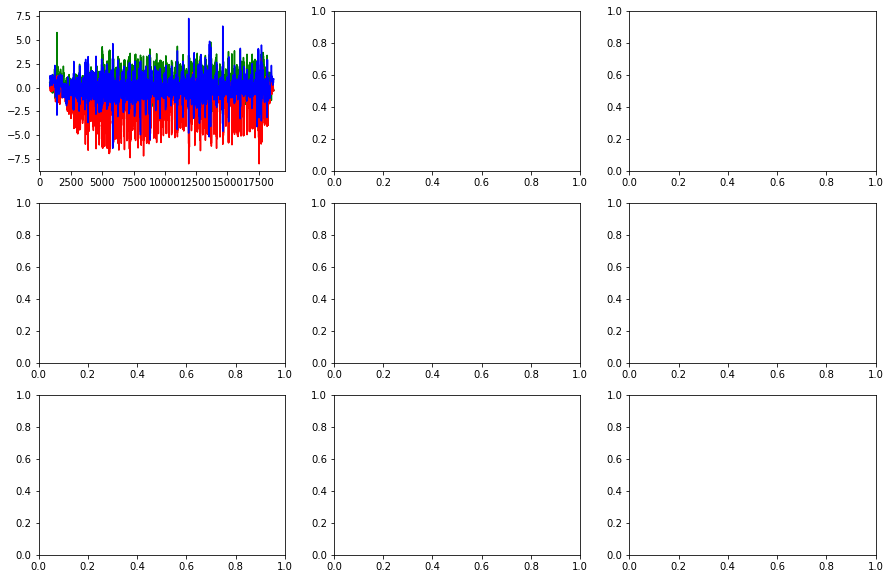

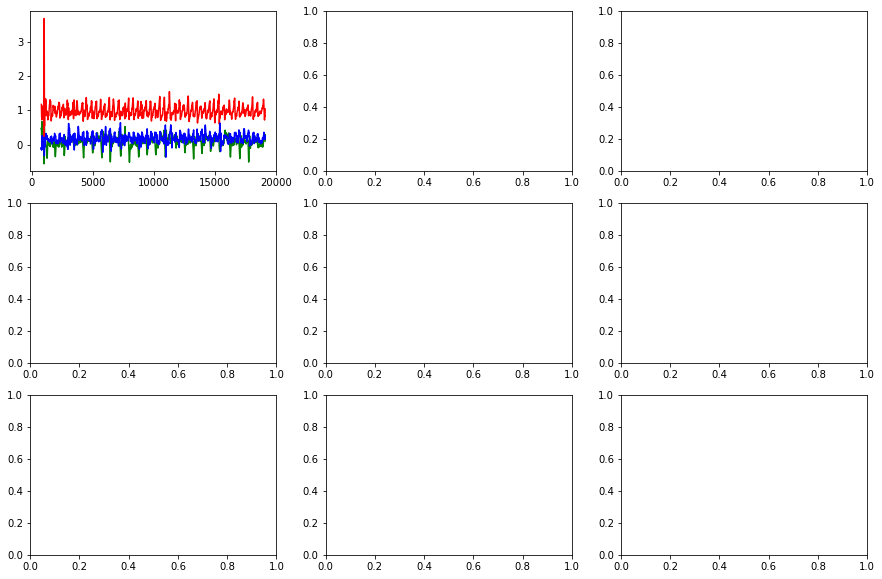

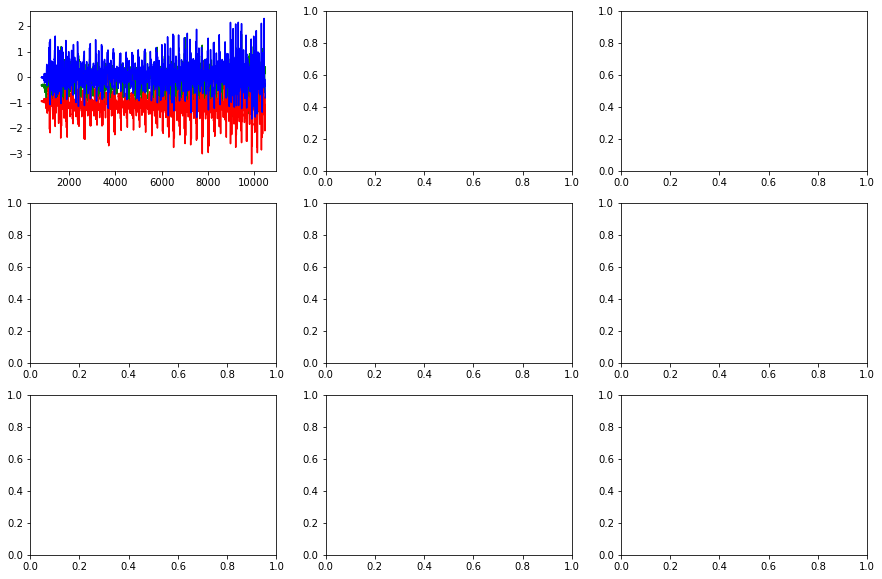

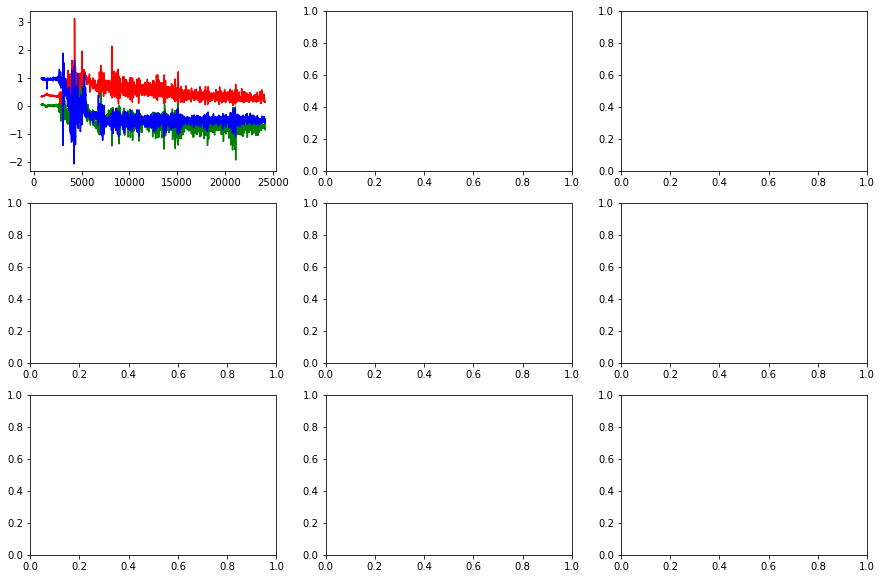

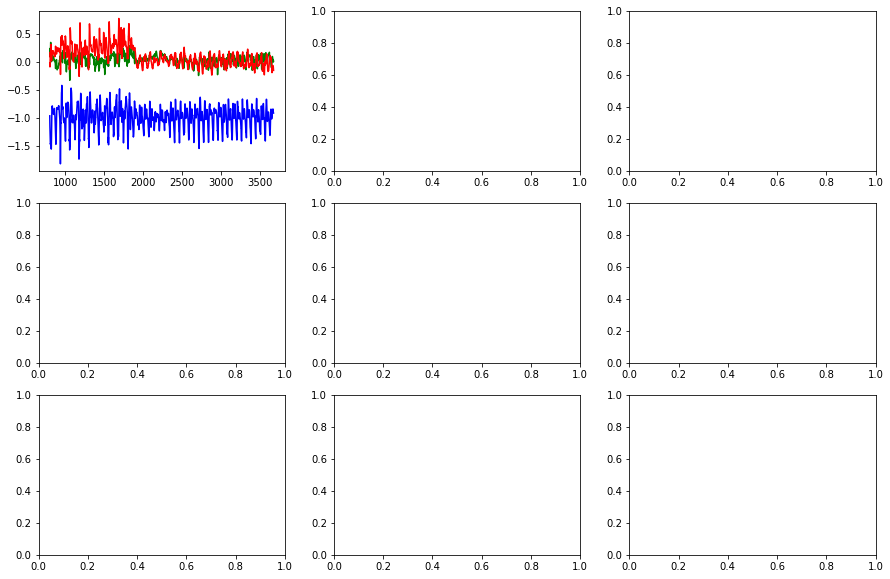

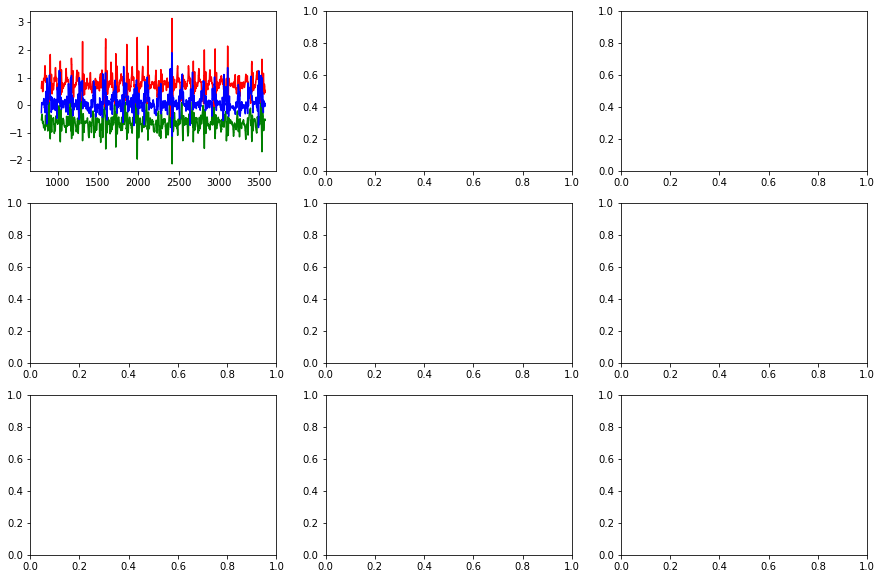

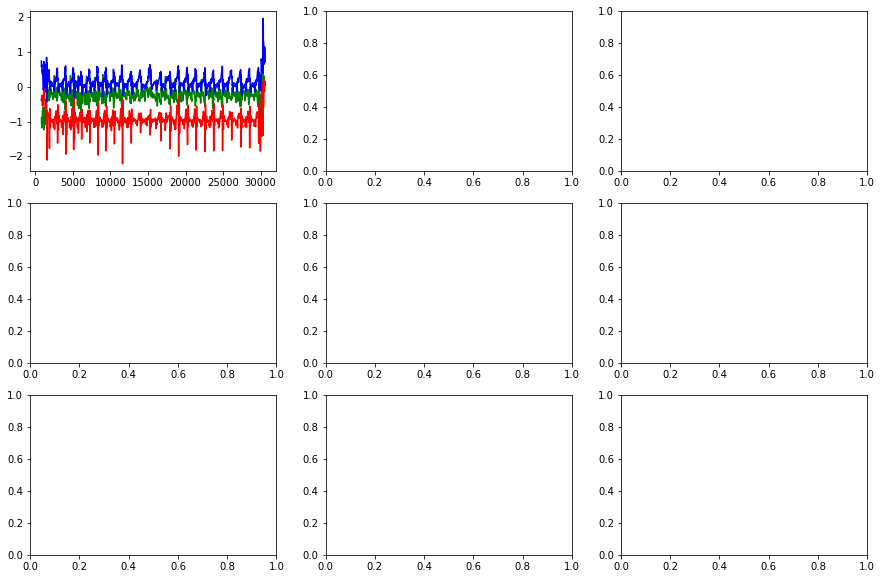

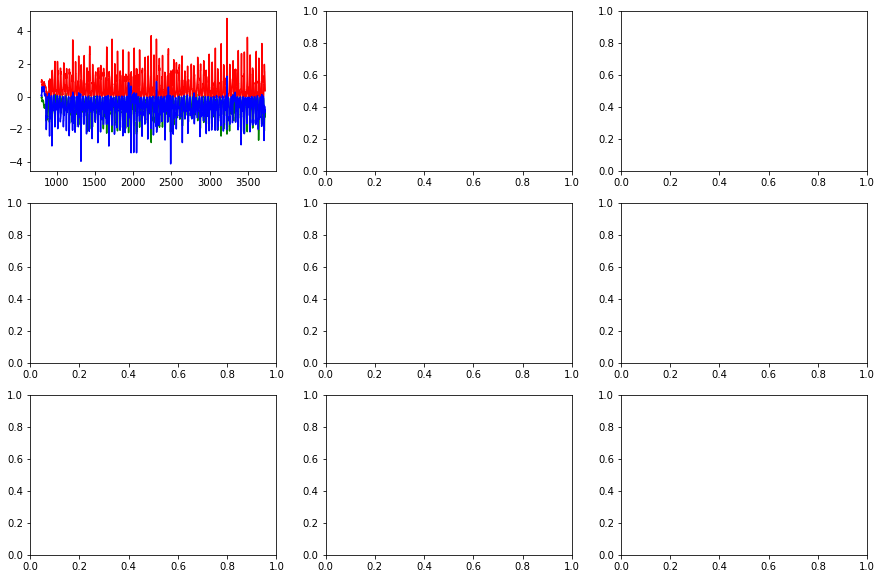

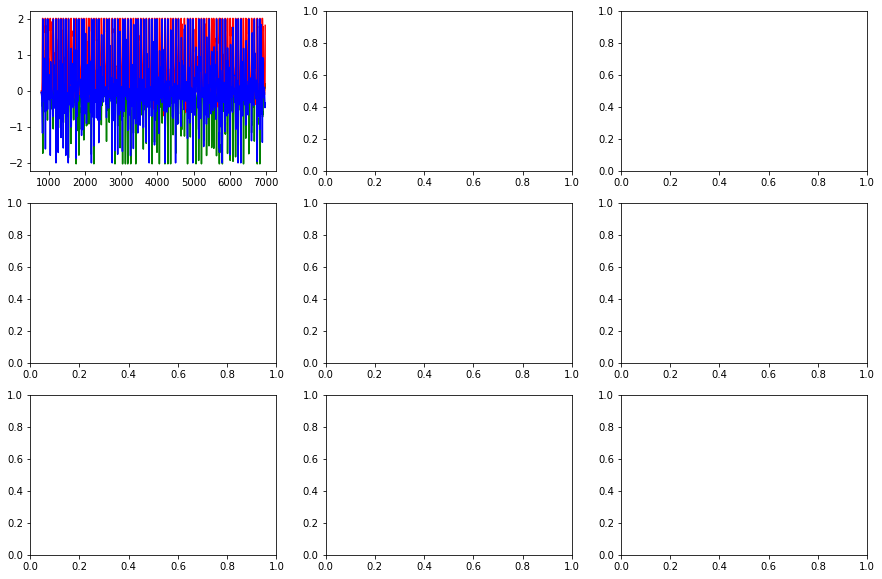

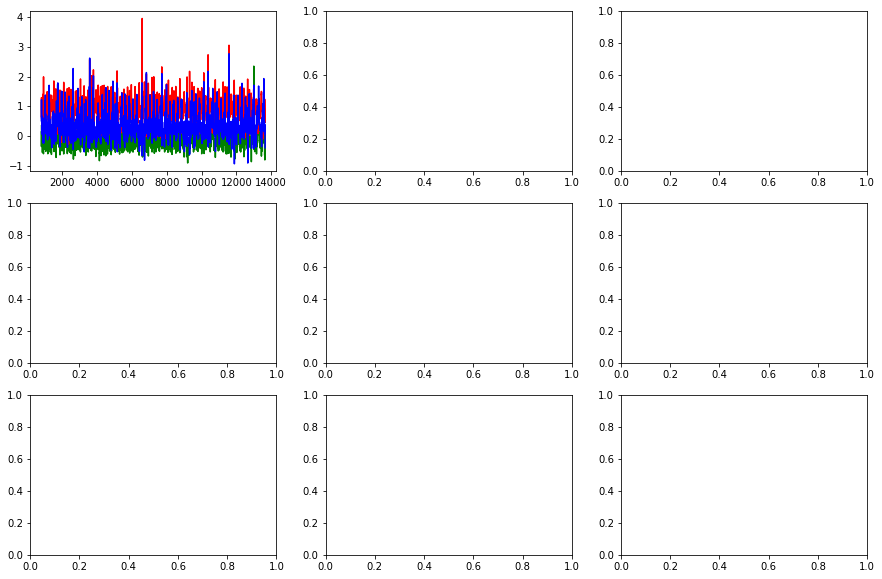

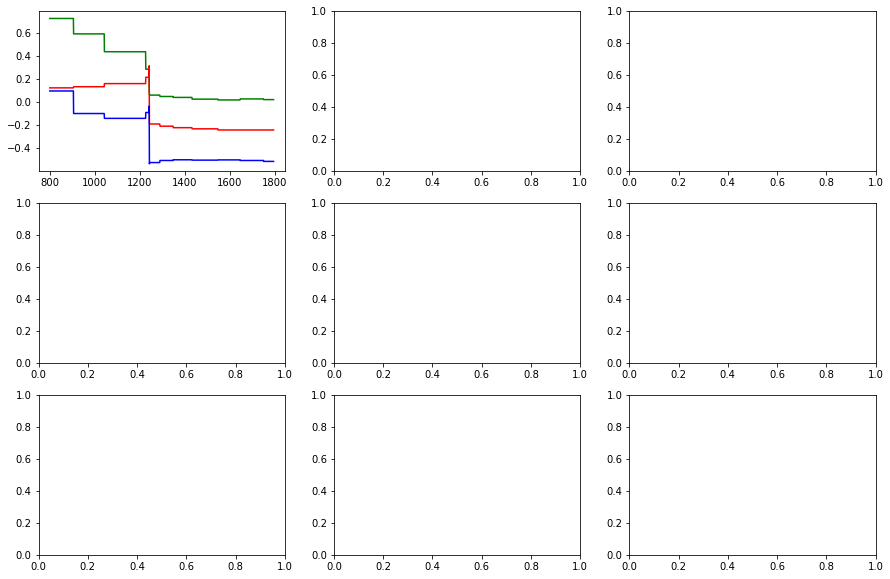

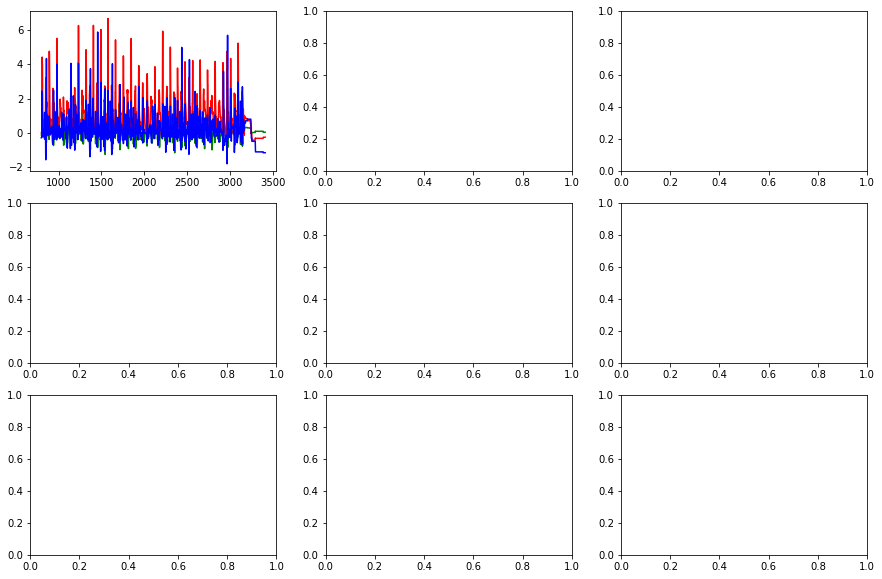

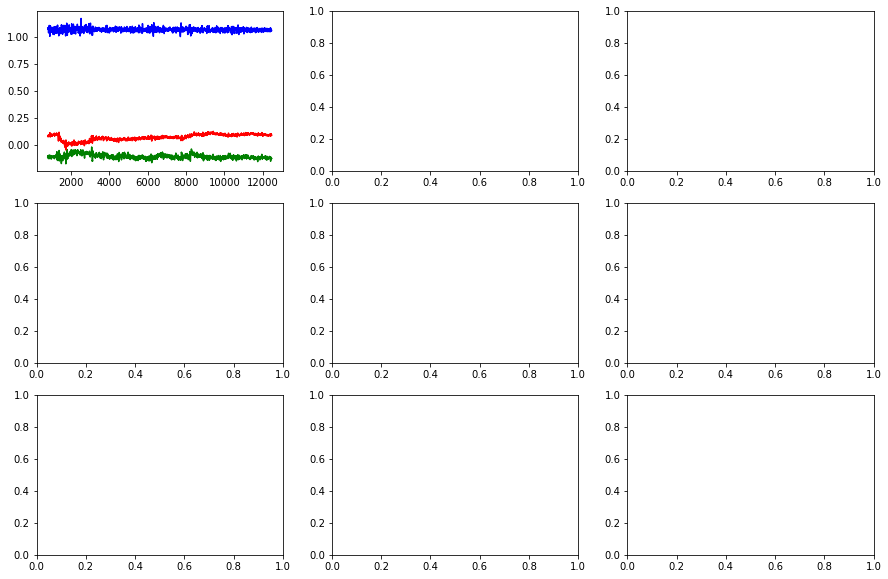

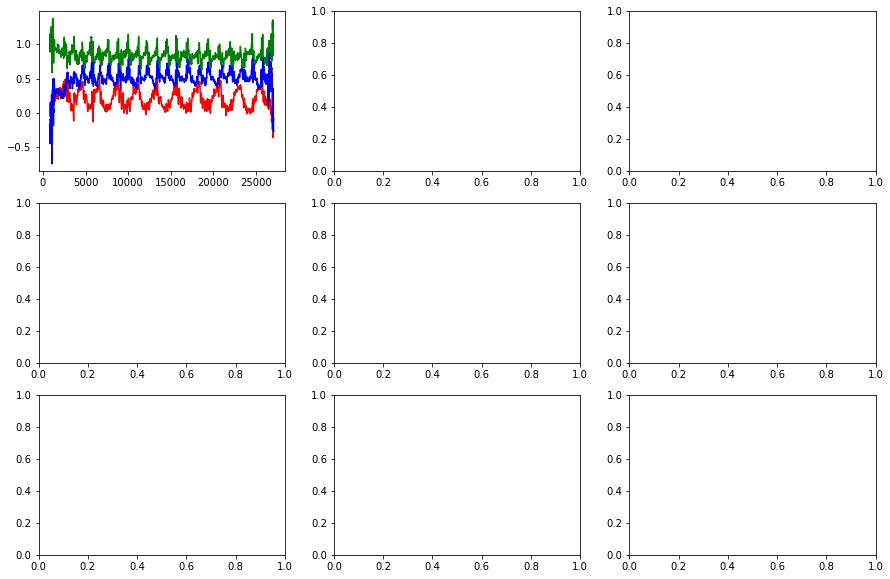

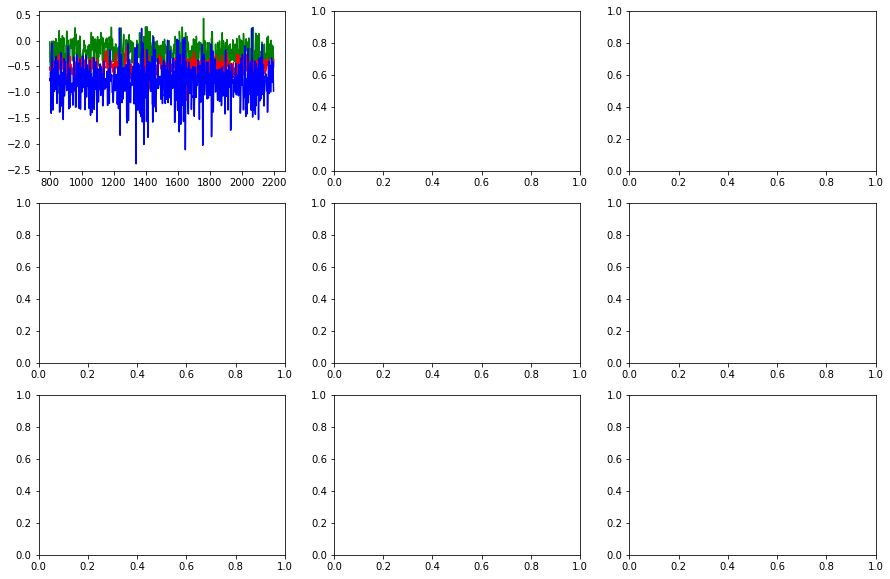

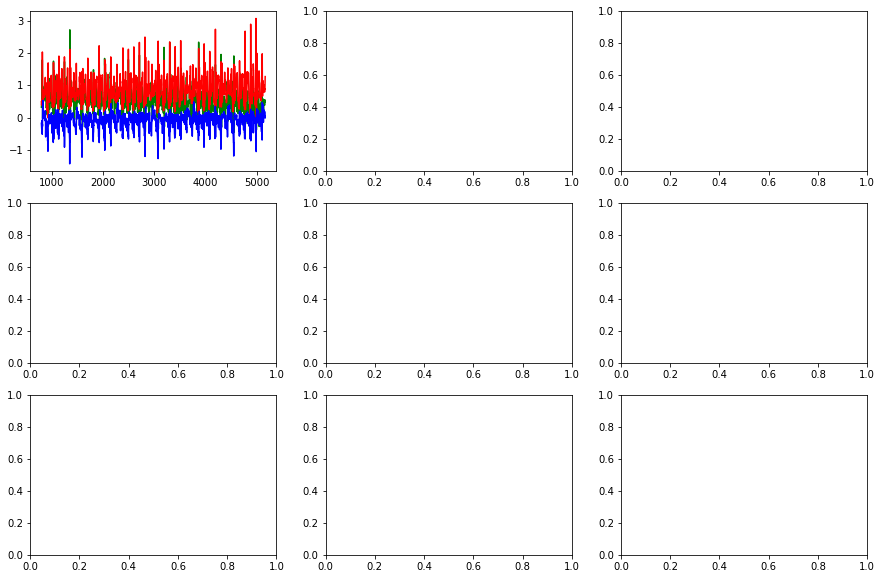

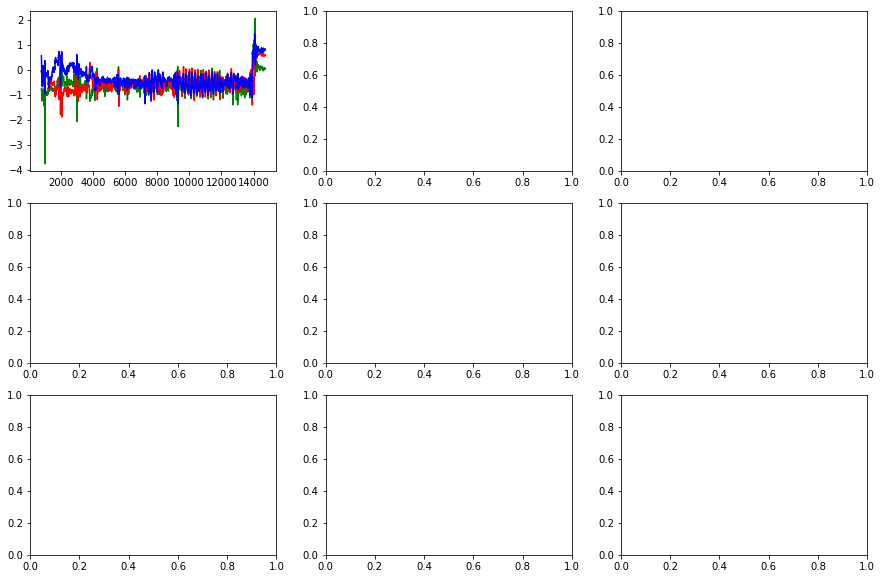

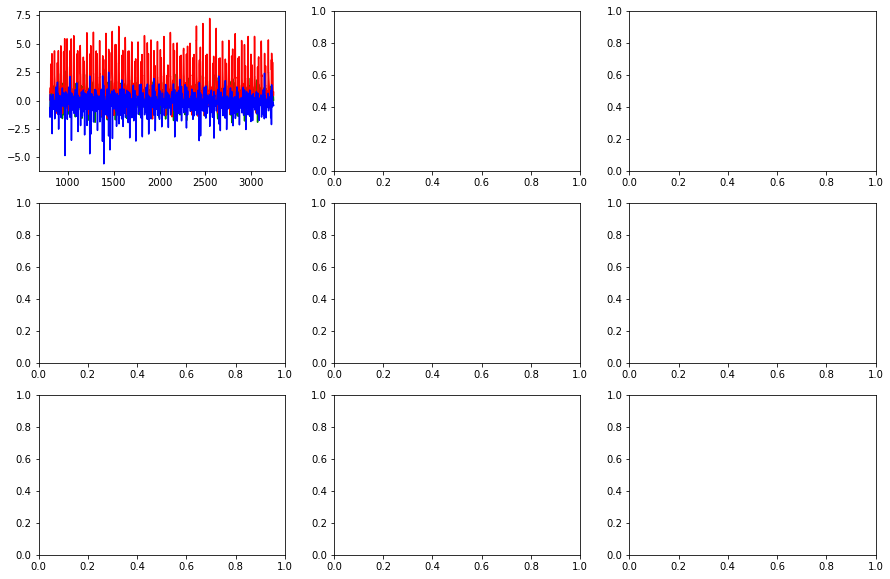

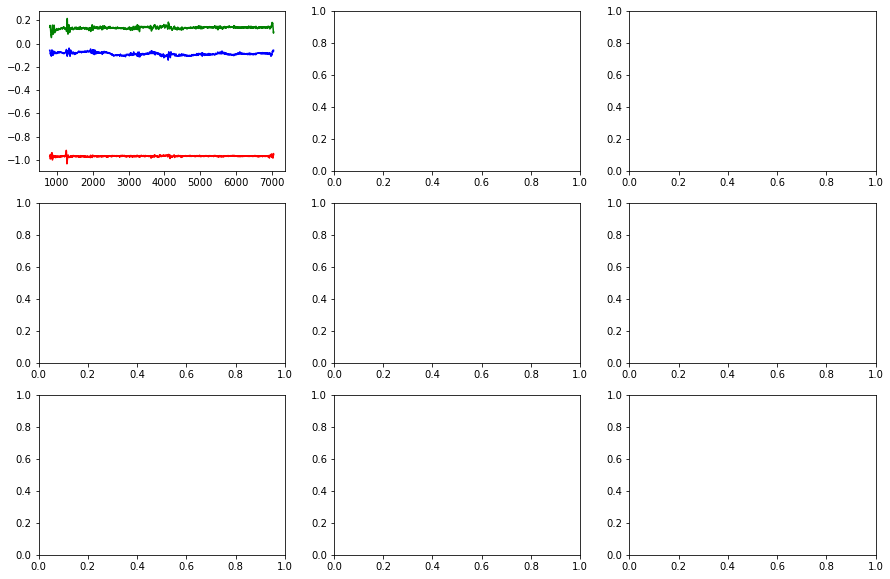

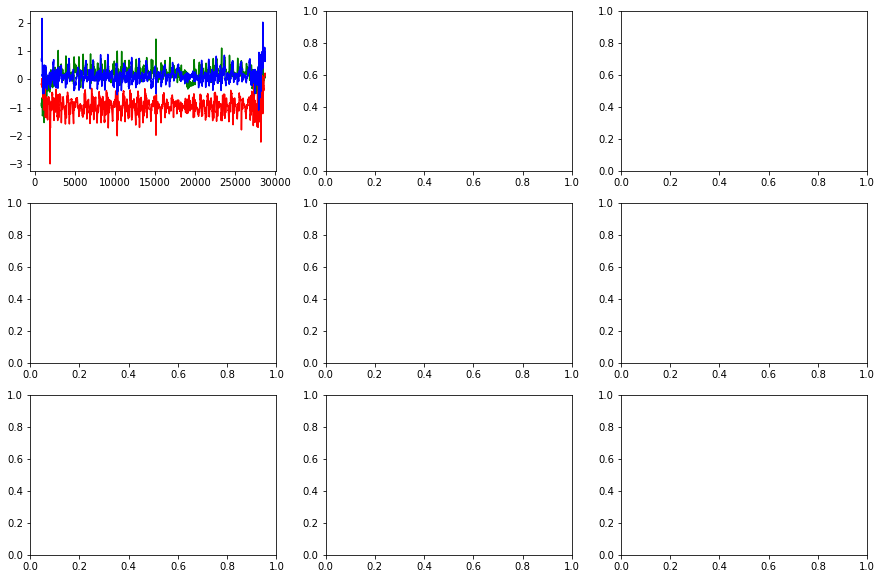

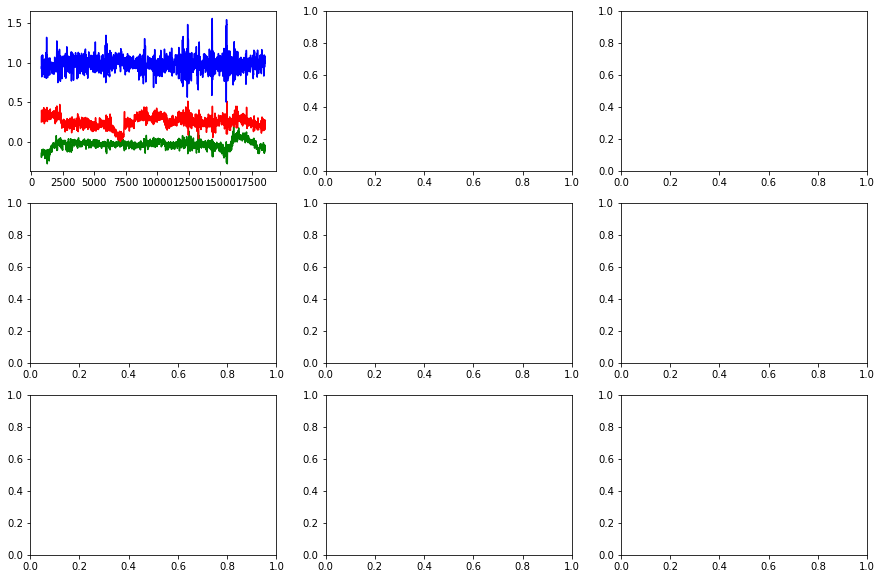

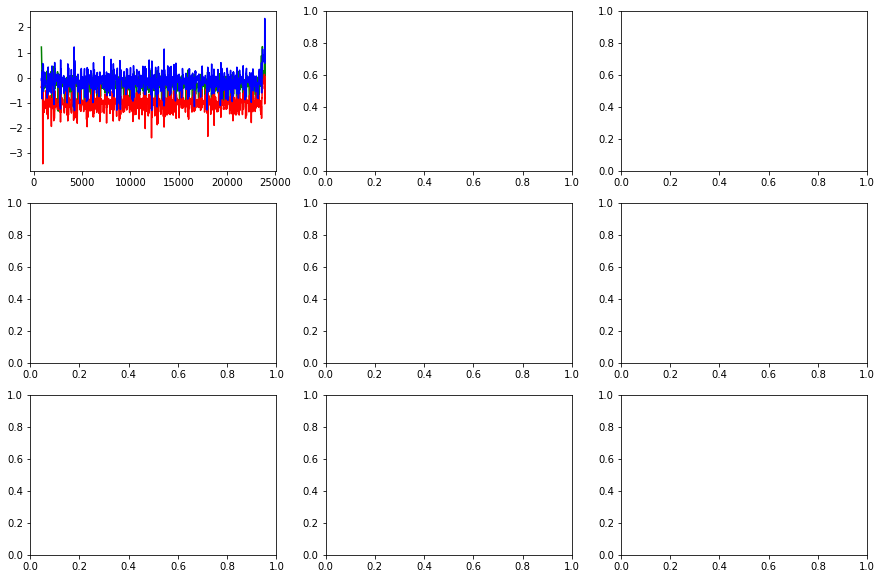

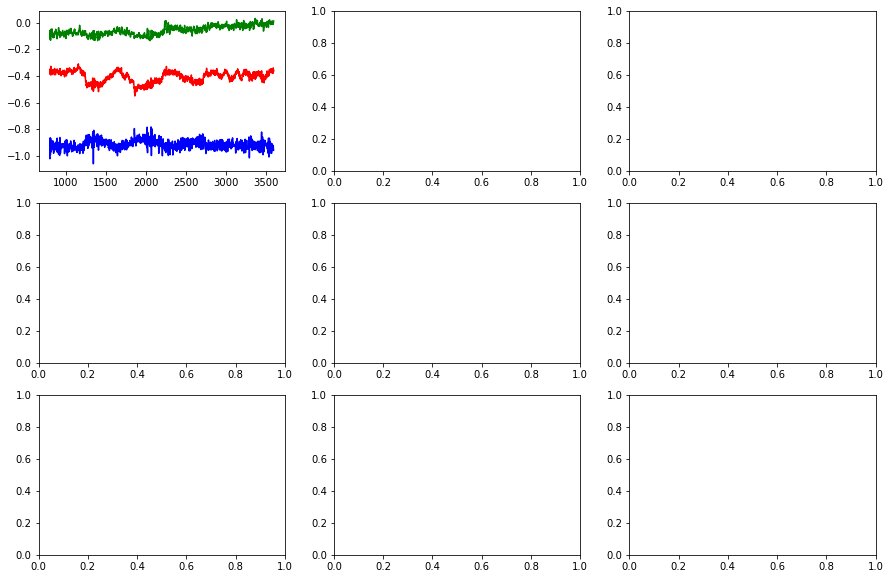

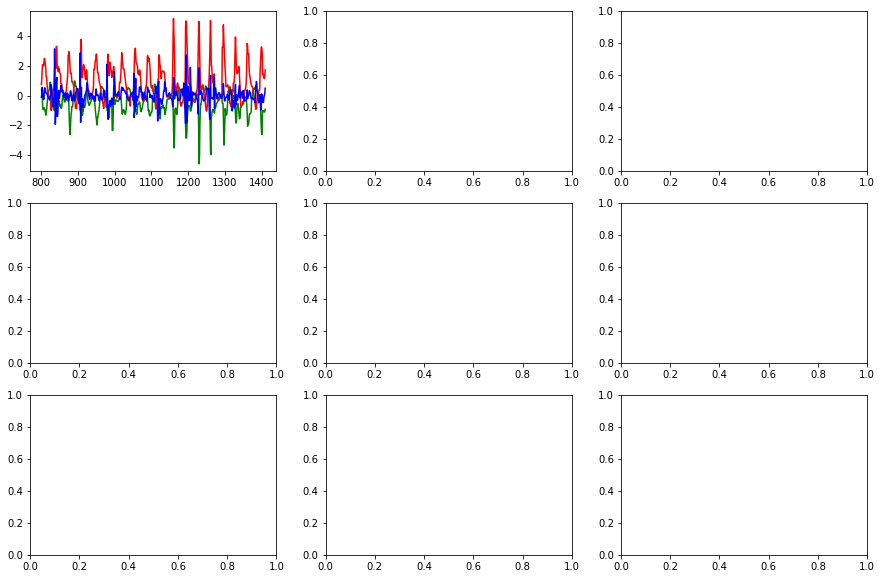

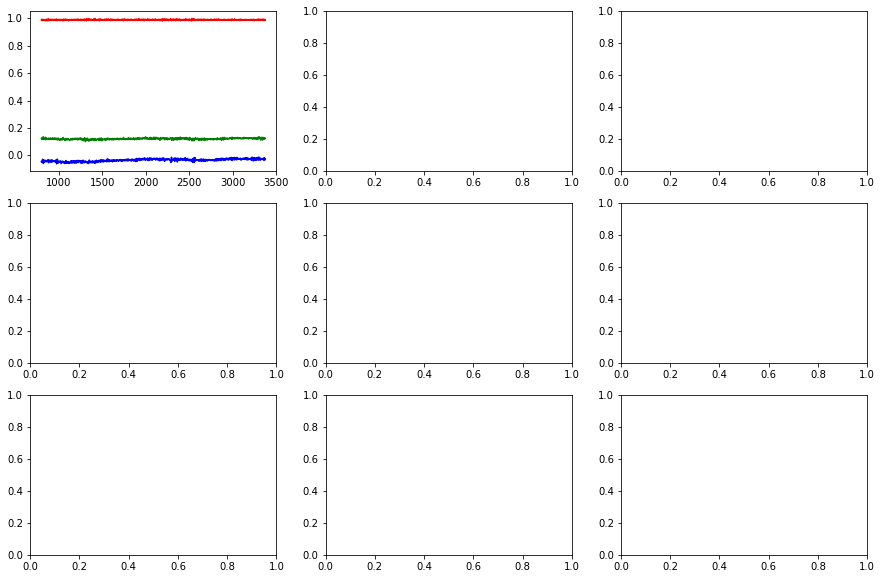

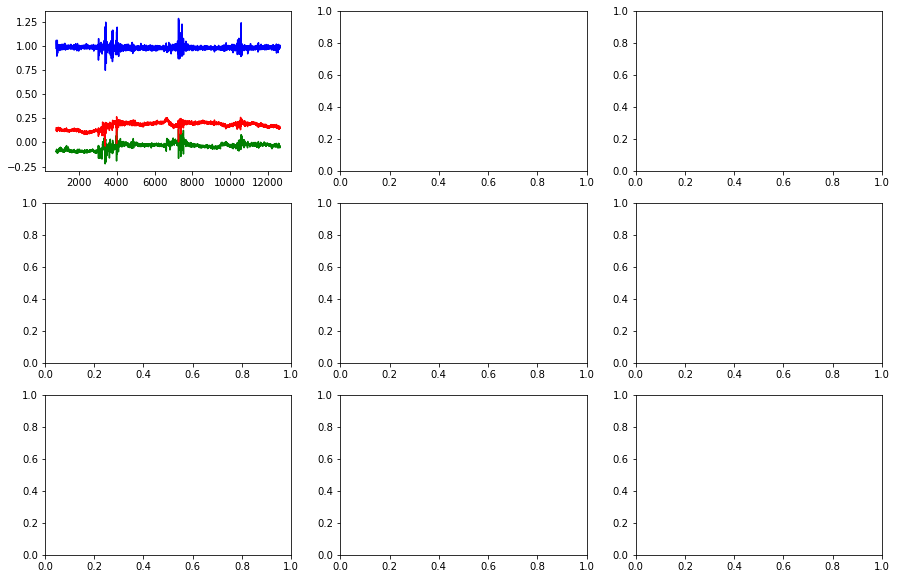

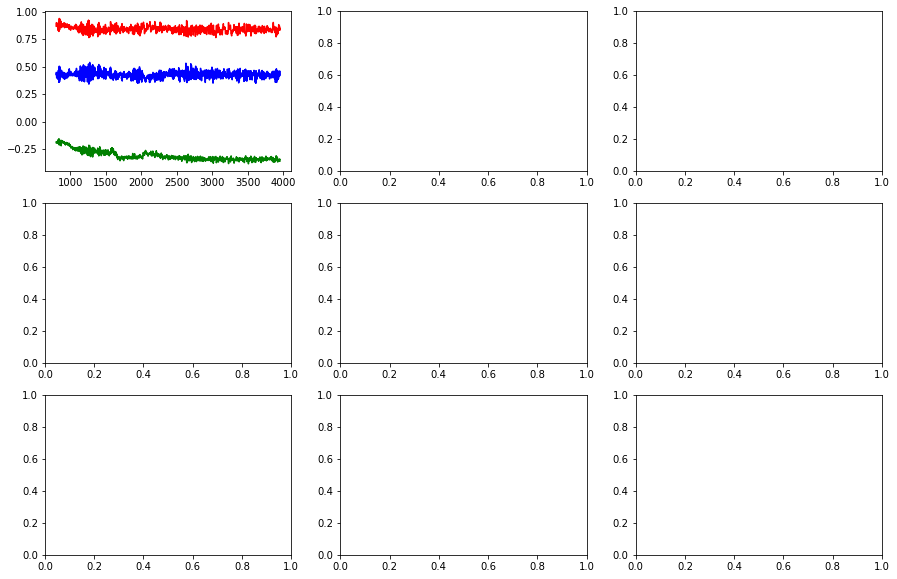

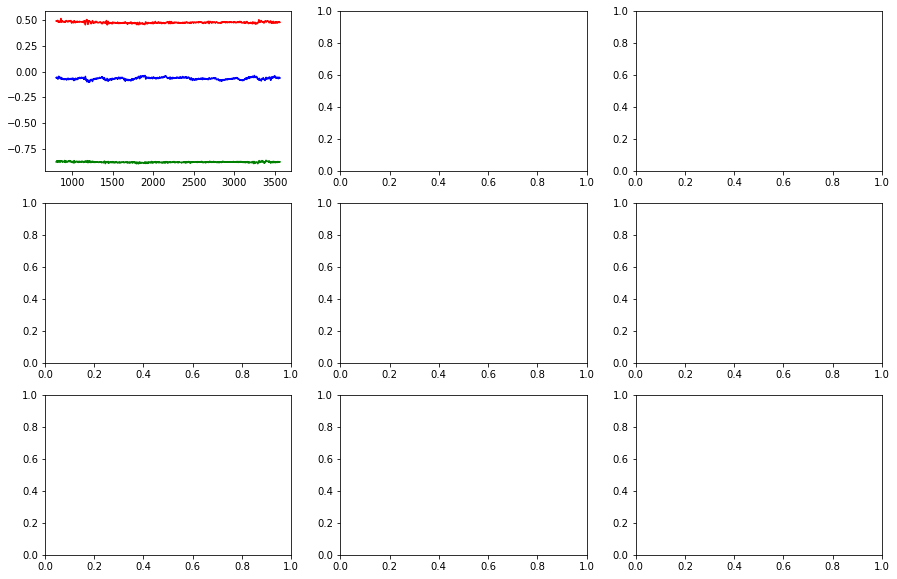

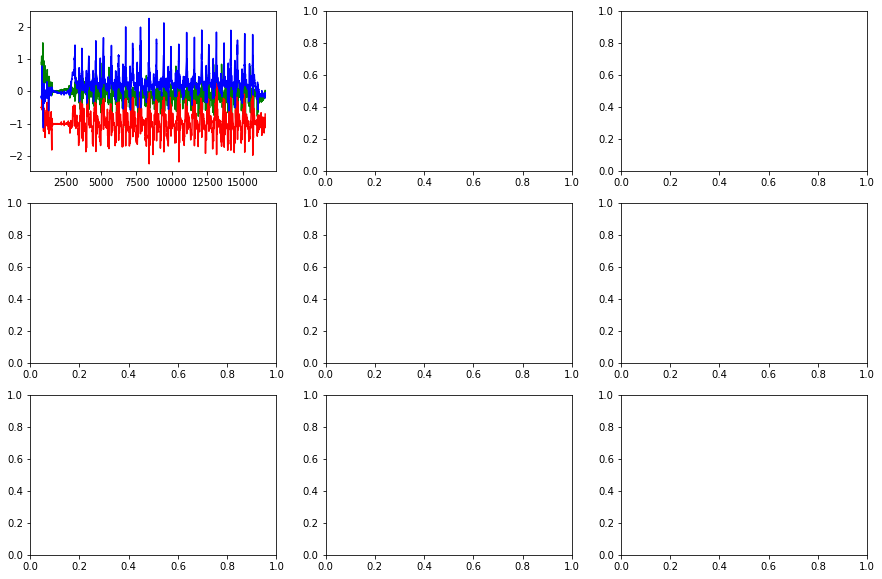

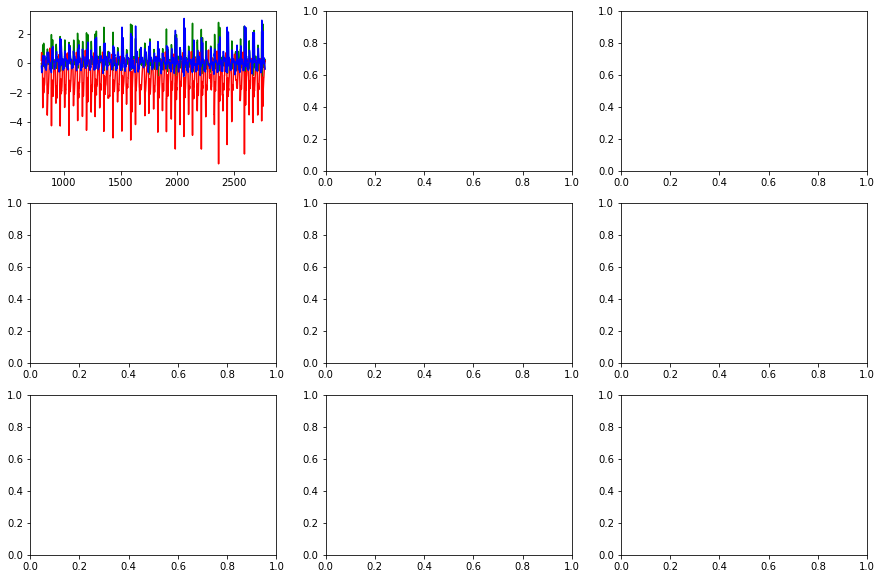

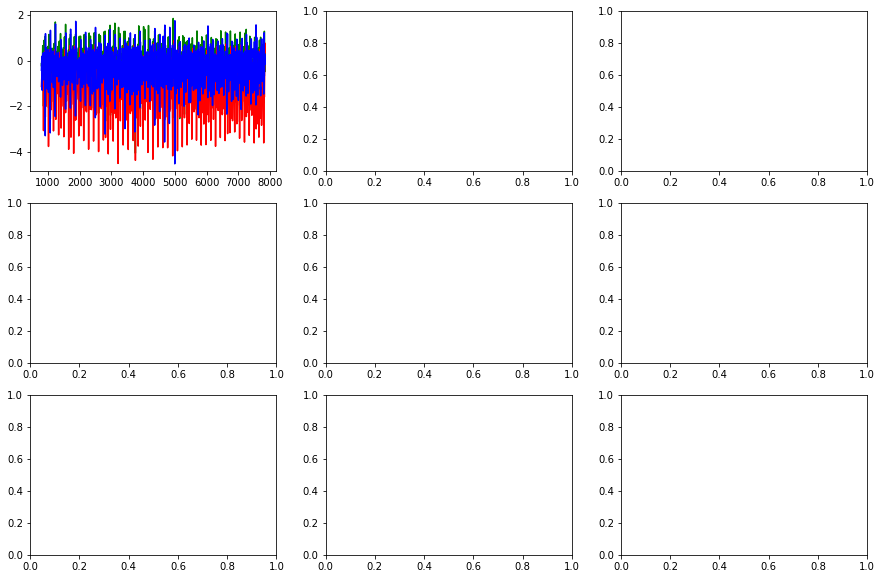

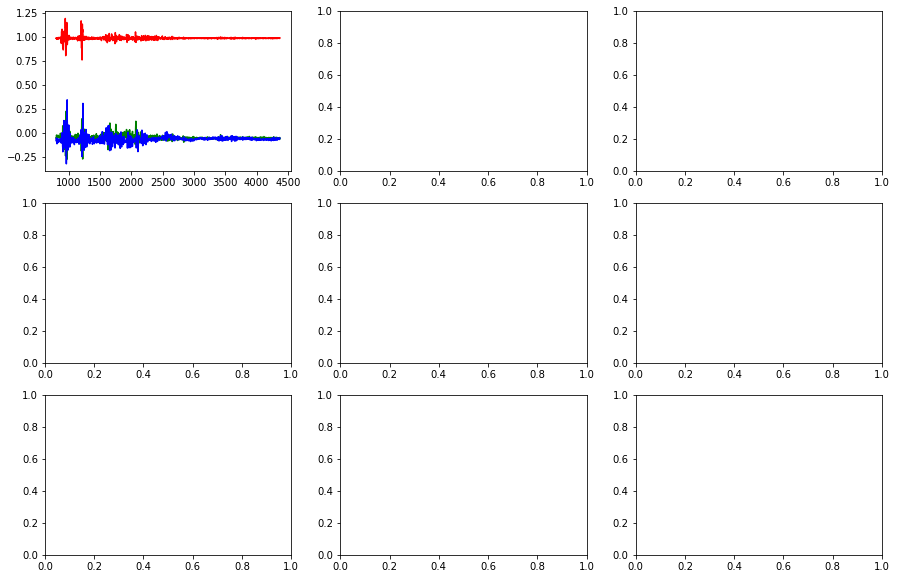

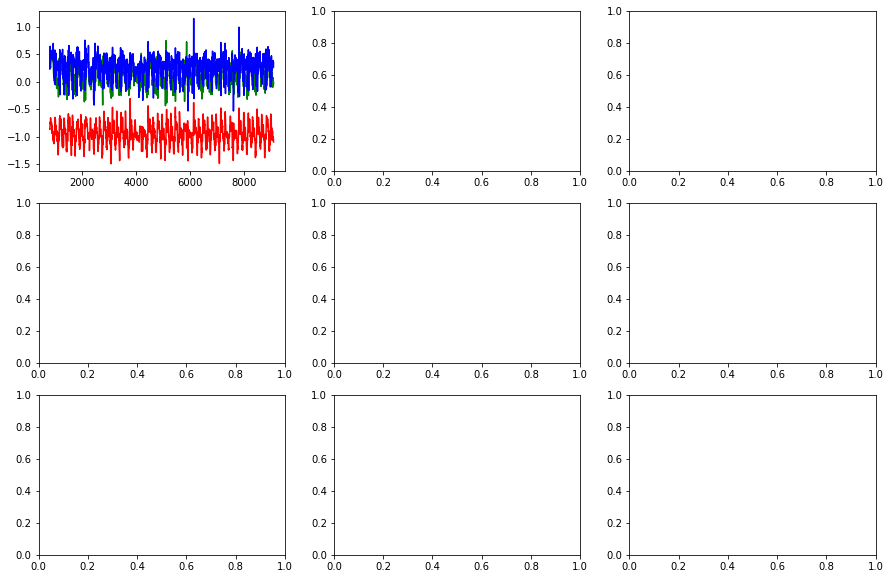

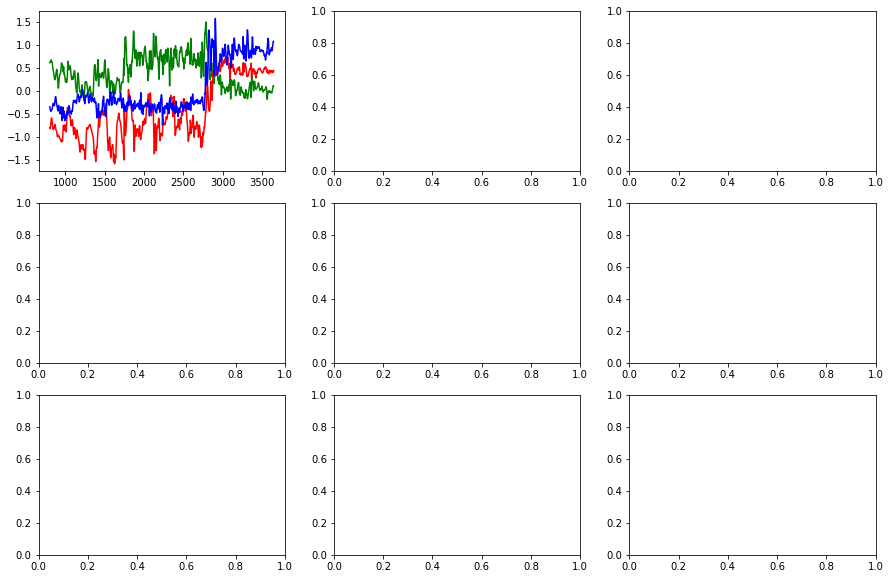

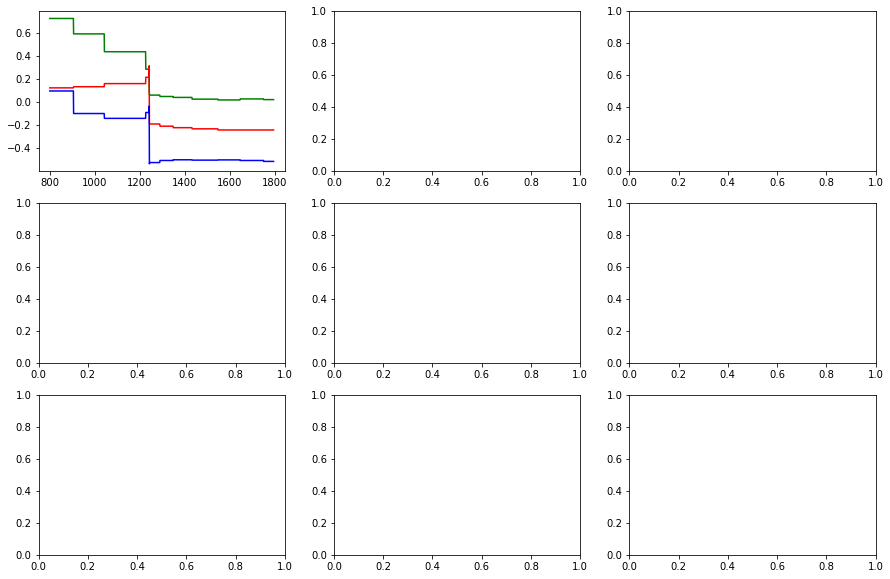

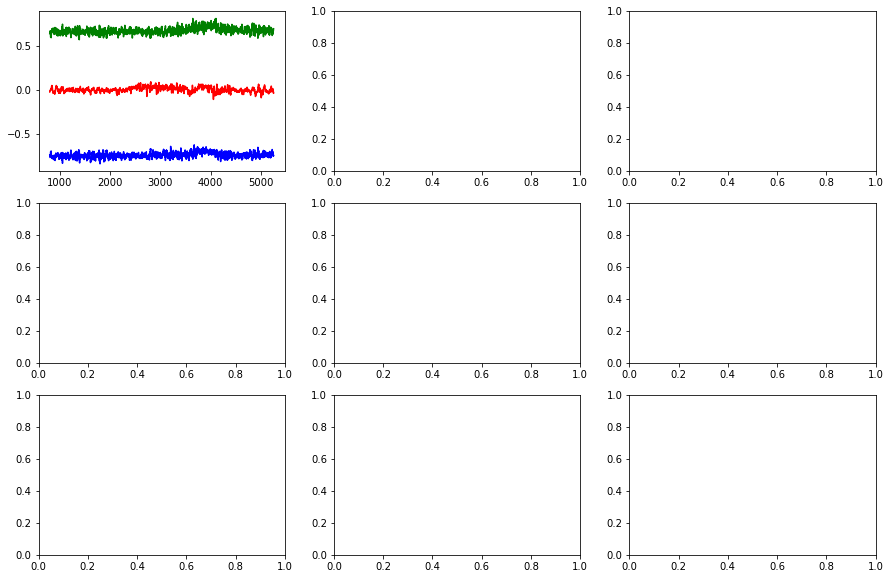

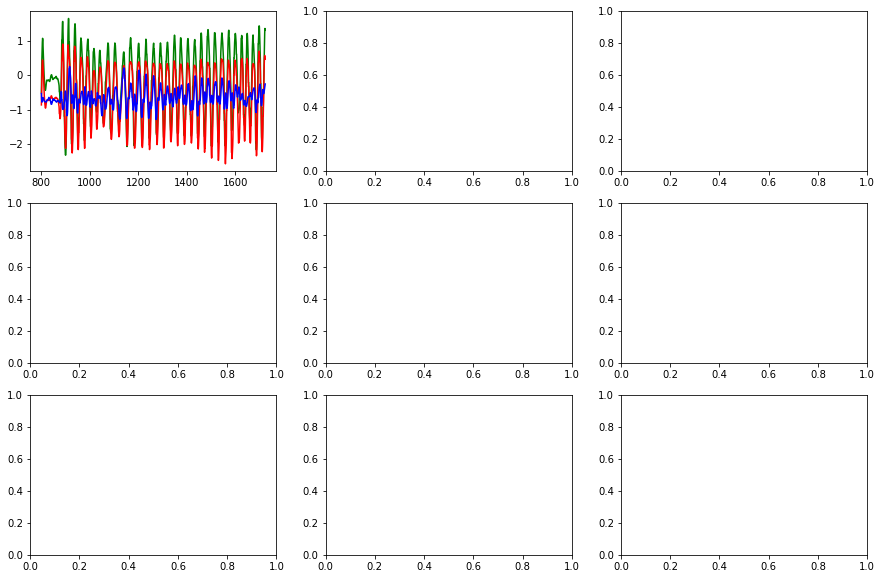

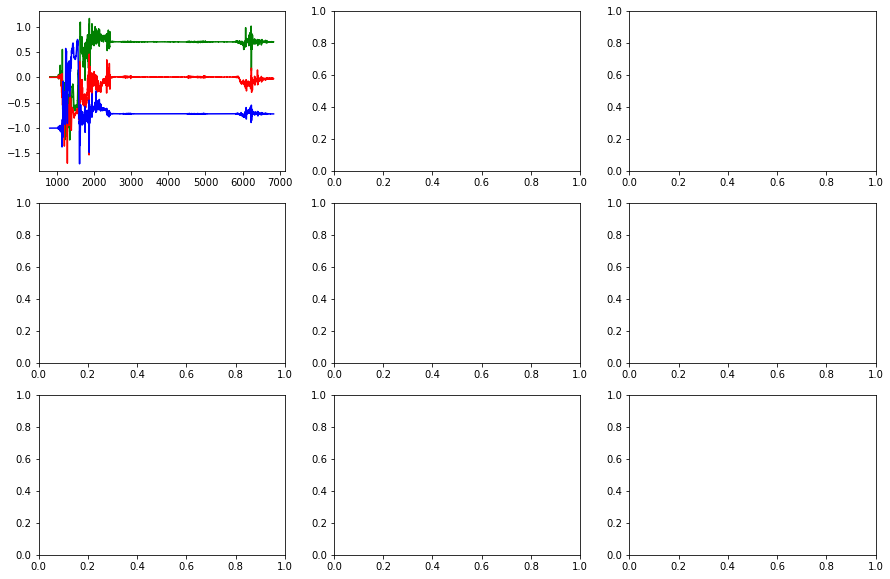

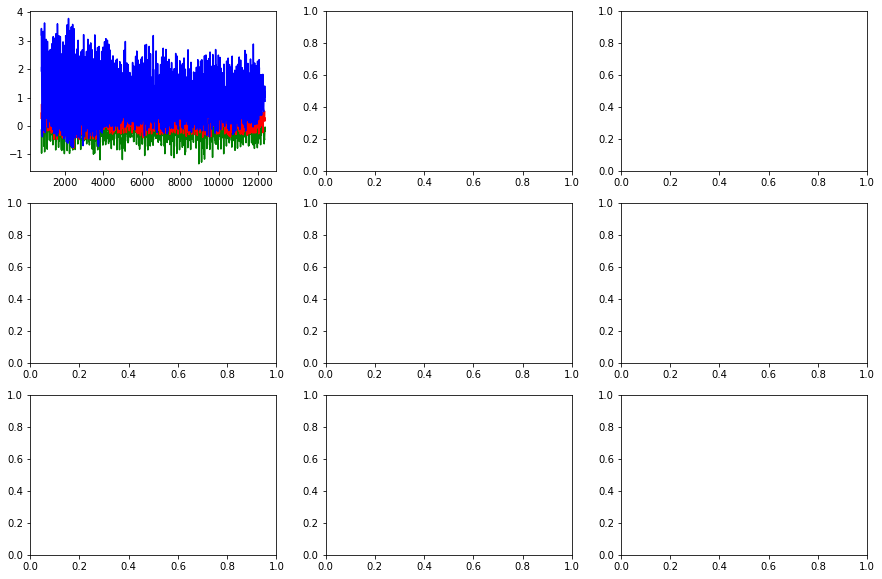

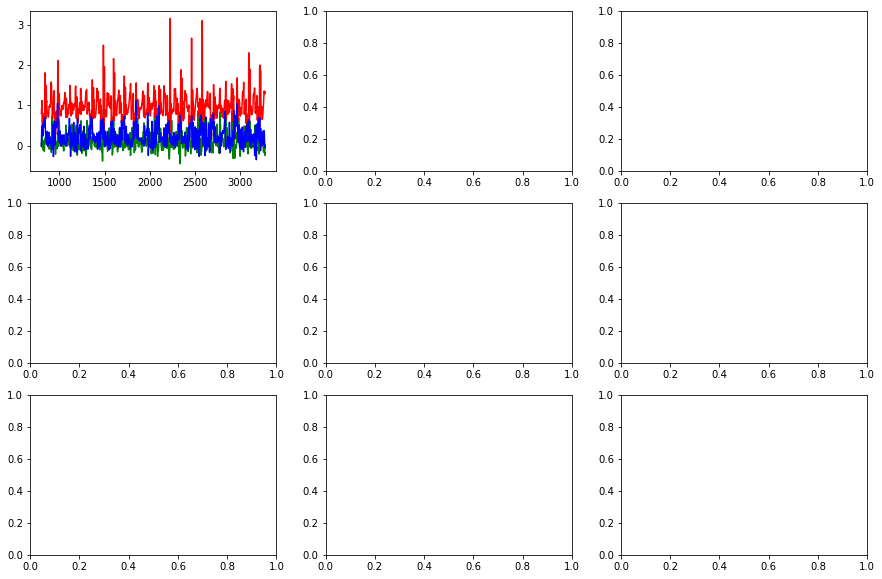

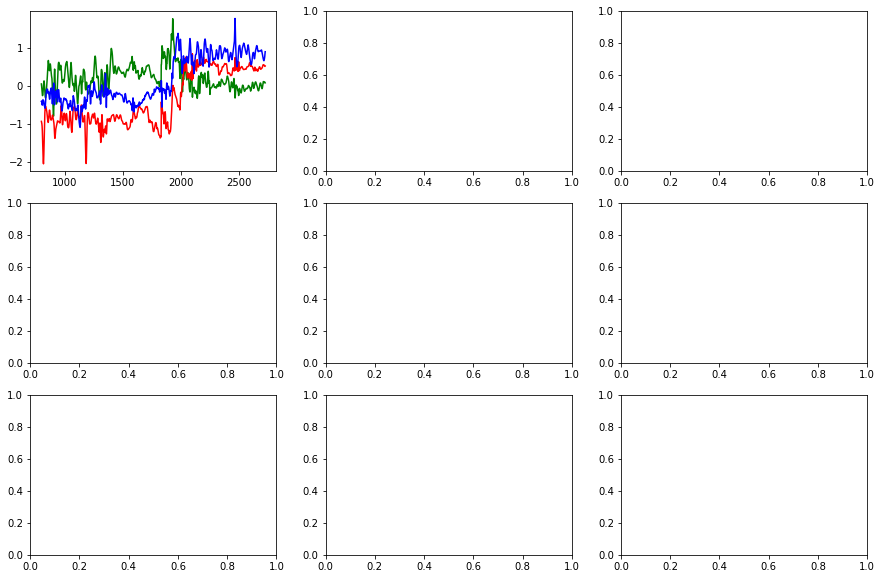

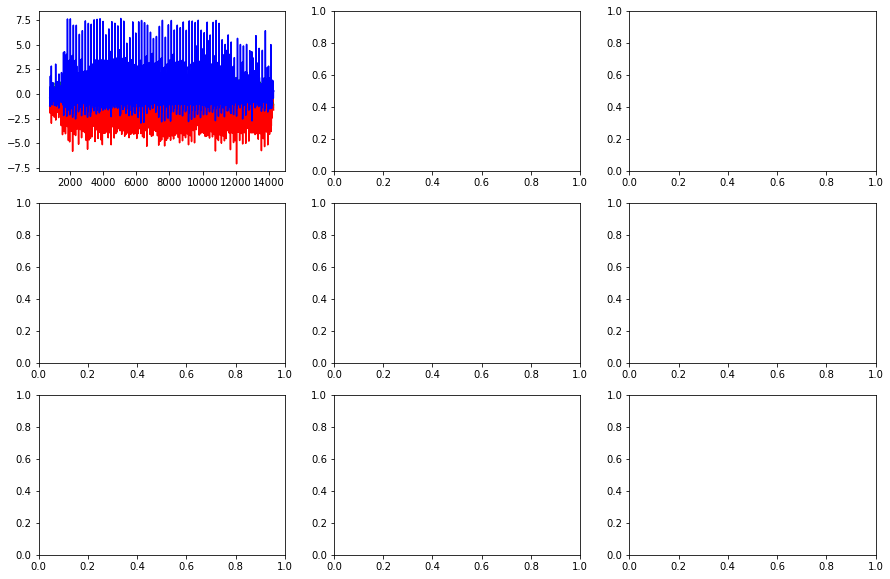

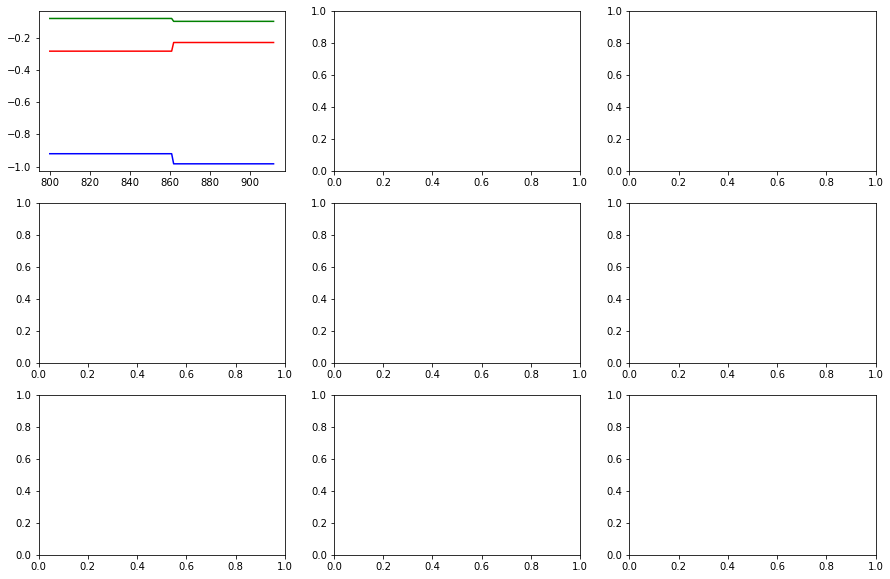

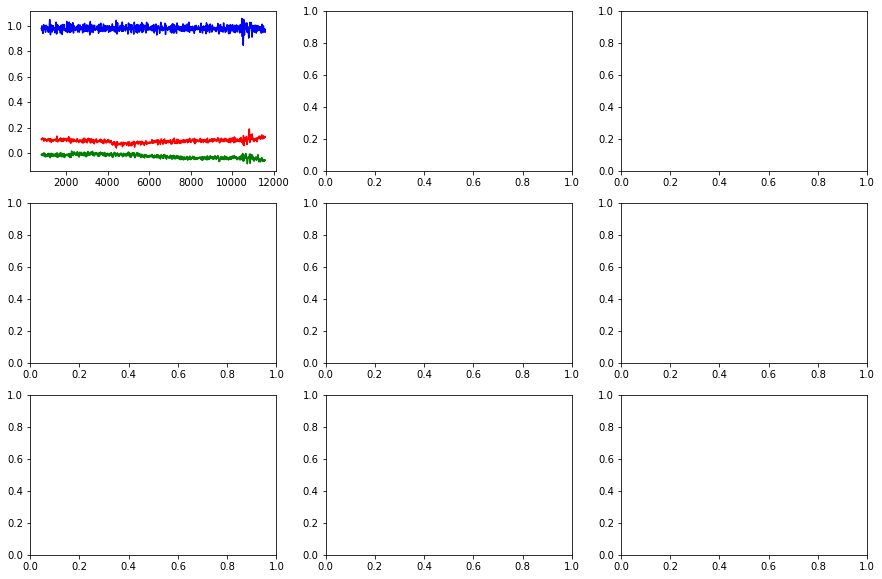

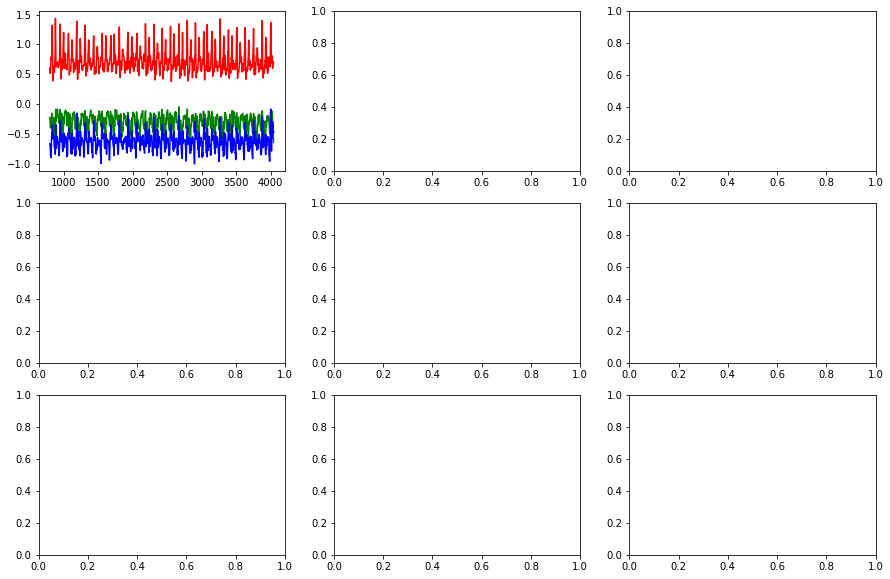

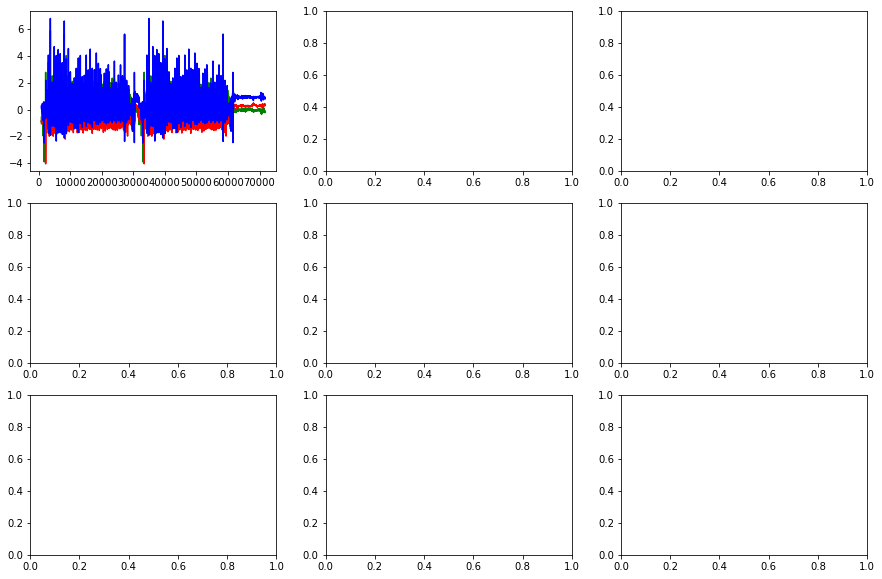

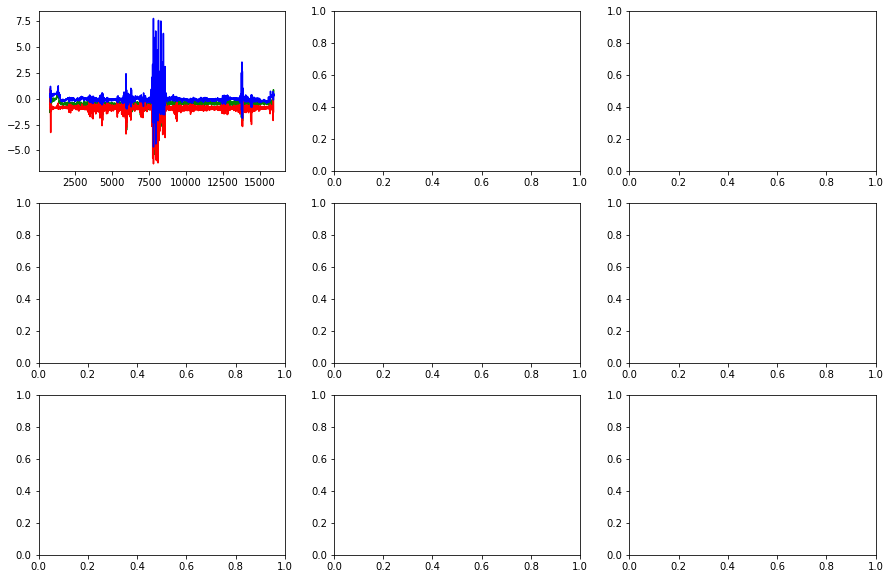

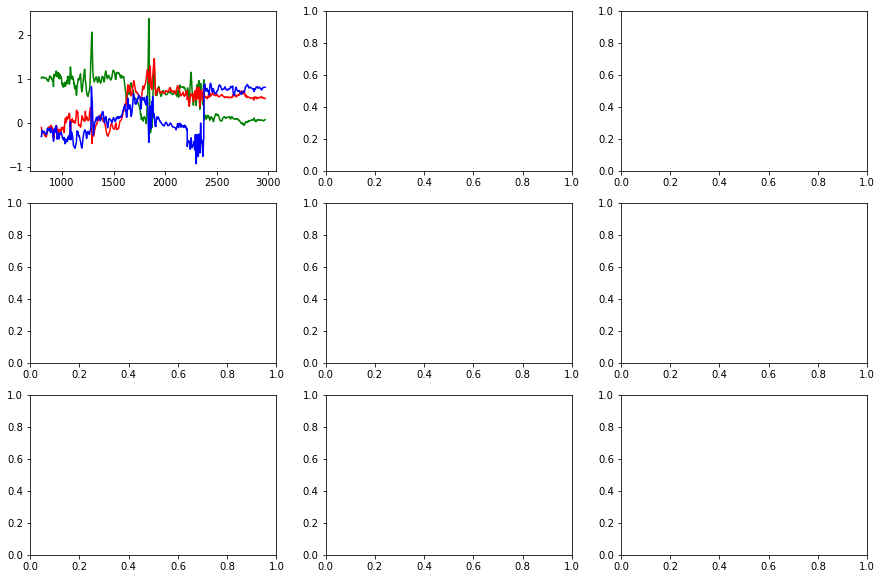

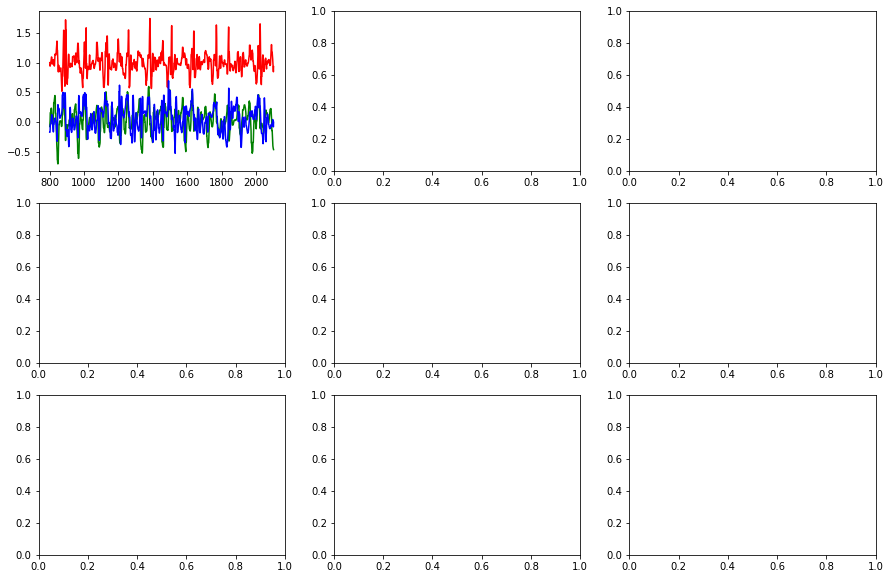

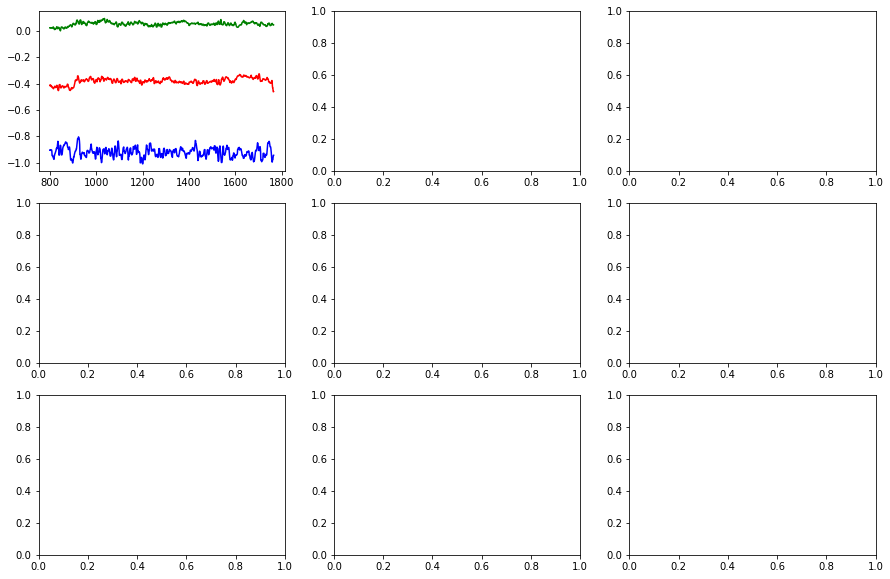

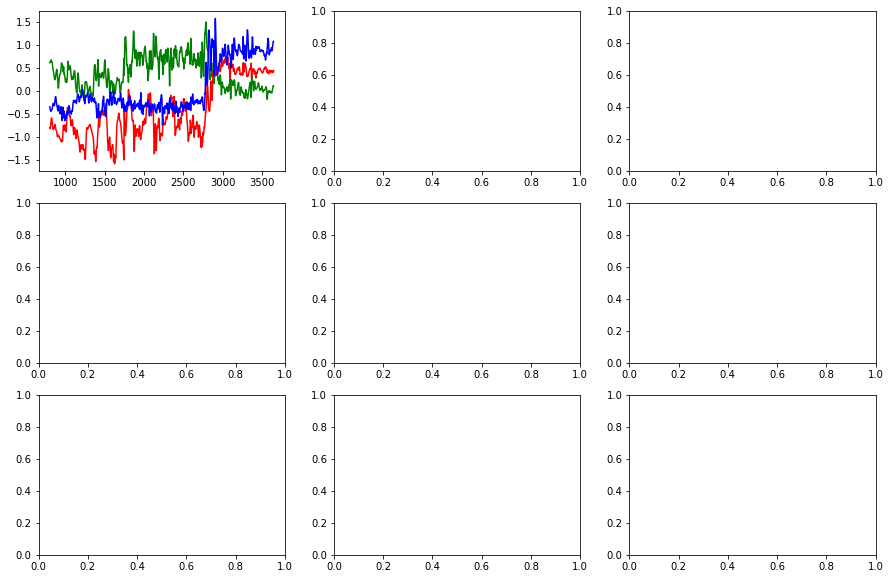

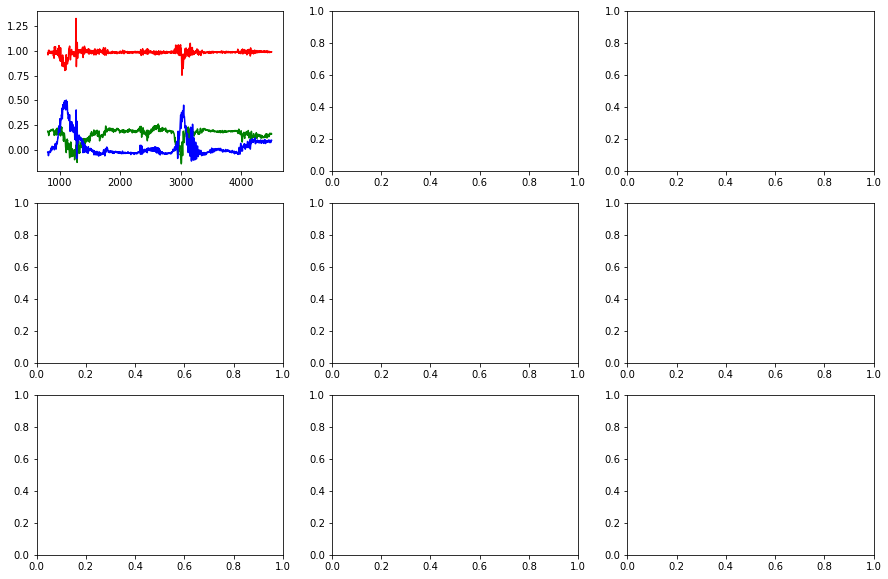

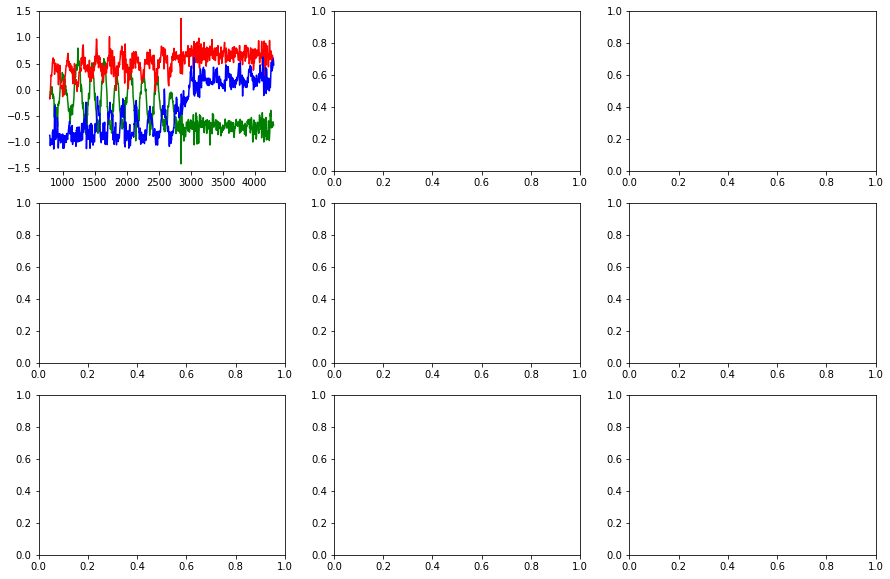

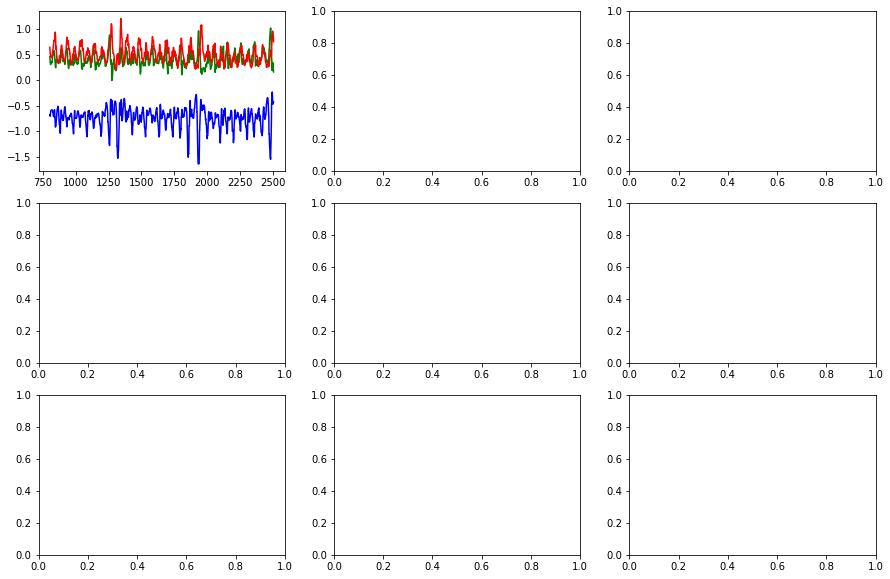

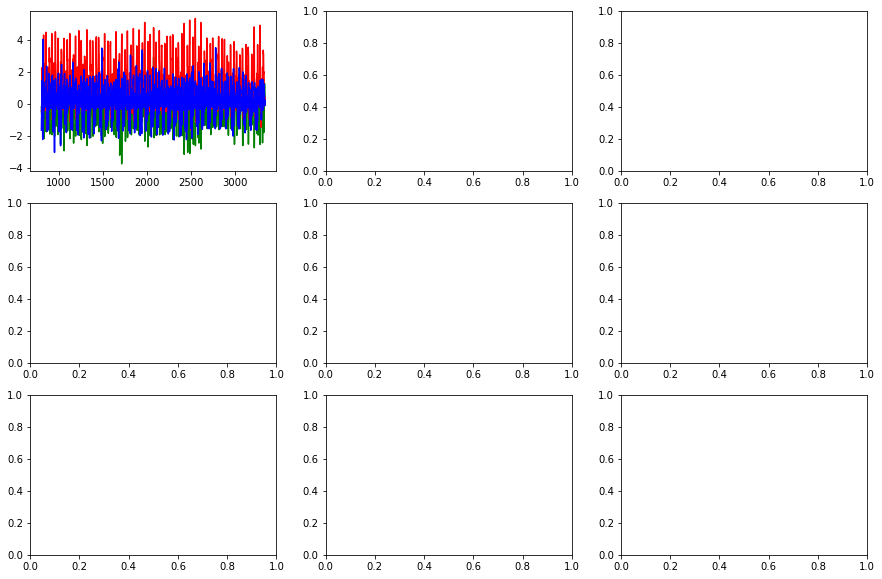

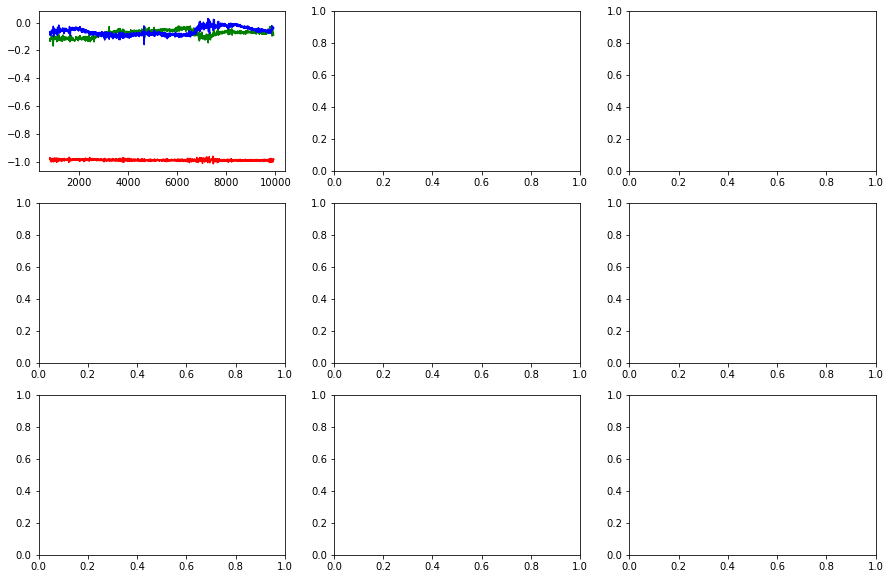

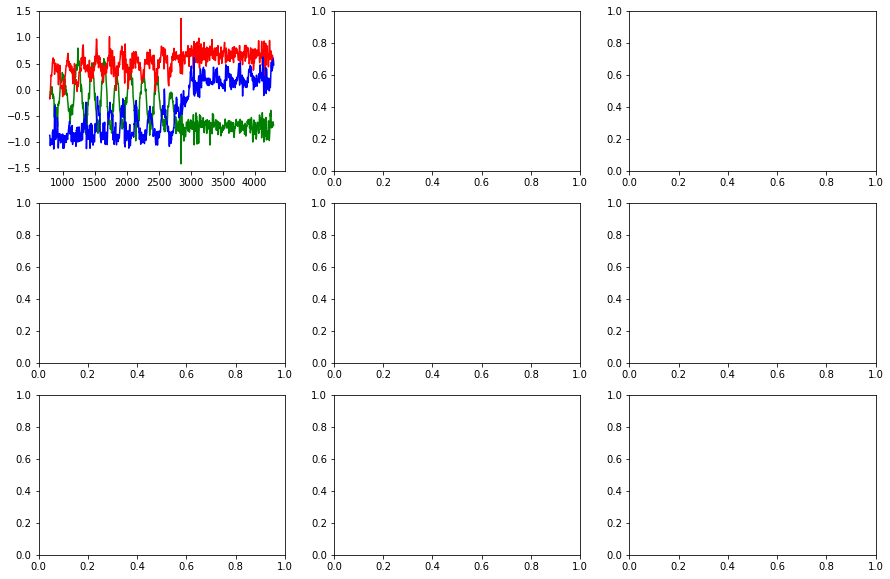

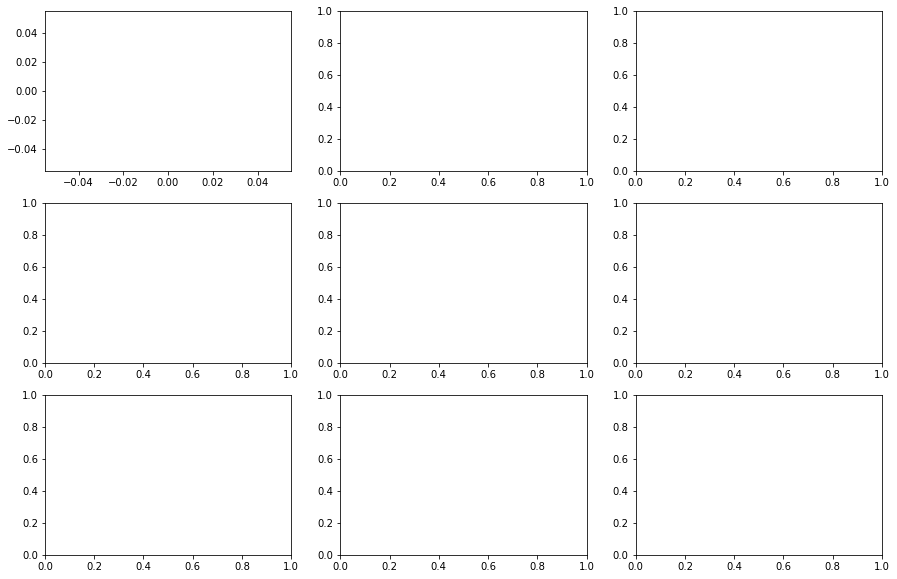

In [124]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
    print(name)
    
    if a == -1:
        st = 800
    else:
        st = a
            
    if b == -1:
        end = -800
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)
    if cut:
        ax1.plot(df.iloc[st:end]['gFx'],c='g')
        ax1.plot(df.iloc[st:end]['gFy'],c='r')
        ax1.plot(df.iloc[st:end]['gFz'],c='b')
    else:
        ax1.plot(df['gFx'],c='g')
        ax1.plot(df['gFy'],c='r')
        ax1.plot(df['gFz'],c='b')
#        show()
########################################################################        
#integration

#вычисляем средний вектор ускорения по треку

    mx = df.iloc[st:end]['gFx'].values.mean() 
    my = df.iloc[st:end]['gFy'].values.mean() 
    mz = df.iloc[st:end]['gFz'].values.mean() 
    
#находим матрицу поворота этого вектора к вектору (0,0,1)

    Vec = [mx,my,mz]
    Point = [0, 0, 1]
    mat = rotation_matrix_from_vectors(Vec, Point)
    
#каждую точку трека поворачиваем на эту матрицу

    new_x, new_y, new_z = rotate(df.iloc[st:end]['gFx'].values, df.iloc[st:end]['gFy'].values, df.iloc[st:end]['gFz'].values, mat)

#проверяем, что новые средние равны примерно (0,0,1). Если это не так, значит, телефон часто поворачивался при движении, и нам не поможет это преобразование

    print('New means:', mean(new_x), mean(new_y), mean(new_z))

#делим на 250*250 (это нужно было еще при интегрировании)
    new_x = [elem / 62500 for elem in new_x]
    new_y = [elem / 62500 for elem in new_y]
#из ускорения по z вычитаем 1 (g), чтобы убрать влияние силы тяжести и оставить только ускорение по z
    new_z = [(elem-1)/62500 for elem in new_z]
    
#дважды интегрируем ускорение, чтобы получить перемещение вдоль каждой оси
    int_x = integrate(integrate(new_x))
  #  ax7.plot(int_x)
    
    int_y = integrate(integrate(new_y))
  #  ax8.plot(int_y)
    
    int_z = integrate(integrate(new_z))
   # ax9.plot(int_z)

########################################################################        
#преобразование Фурье
########################################################################        

    Fs = 250 #частота сбора данных
    y = df.iloc[st:end]['gFx'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    Min = 0
    
   # ax4.plot(frq,yabs) # plotting the spectrum
   # ax4.set_xlim([0,30]) #очень большие частоты нам не нужны
   # ax4.set_ylim([Min,0.1]) #не смотрим на близкие к нулю величины частот

    
    y = df.iloc[st:end]['gFy'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
   # ax5.plot(frq,yabs) # plotting the spectrum
   # ax5.set_xlim([0,30])
   # ax5.set_ylim([Min,0.1])


    y = df.iloc[st:end]['gFz'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
   
    #6.set_xlim([0,30])
    #ax6.set_ylim([Min,0.1])


    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5

    y = Acc.values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    
    yabs = abs(Y)
    #ax3.plot(frq,yabs) # plotting the spectrum
    #ax3.set_xlim([0,30])
    #ax3.set_ylim([Min,0.1])
########################################################################        
    
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    #ax2.plot(Acc)
    #plt.show()
    yabs = yabs[10:]
    print(name + ' Амплитуда:', Acc.max()-Acc.min(), 'max FFT:', max(yabs))
    
    if get_action(name) == 1:
        maxes1.append(max(yabs))
    elif get_action(name) == 3:
        maxes3.append(max(yabs))
    elif get_action(name) == 4:
        maxes4.append(max(yabs))
    elif get_action(name) == 5:
        maxes5.append(max(yabs))
    
    return Acc.max()-Acc.min(), max(yabs)


maxes1 = []
maxes3 = []
maxes4 = []
maxes5 = []
_amp = np.zeros(len(Data))
_maxes = np.zeros(len(Data))



for df, target in zip(Data,Target):
    track_num = int(target.split('_')[1].split('.')[0])
    _amp[track_num], _maxes[track_num] = process_data(df, name=target)


Напишем функцию для получения предсказания (здесь используется только амплитуда, но в вашем итоговом решении будет больше признаков)

In [141]:
def get_prediction(ampl, _max):
    if ampl < 0.3:
        return 6
    if ampl < 1:
        if (_max < 0.01):
            return 0
        if (_max > 0.021):
            return 3
        if (_max <= 0.021):
            return 5
    if ampl >  5:
        if (_max >= 0.15):
            return 2
        if (_max <= 0.058):
            return 3
        if (_max > 0.058):
            return 4
    if ampl <= 1.5:
        if (_max > 0.01):
            return 1
        if (_max > 0.021):
            return 3
        if (_max <= 0.021):
            return 5
    if (_max >= 0.15):
        return 1
    if (_max < 0.011):
        return 3
    if (_max > 0.1):
        return 1
    return 4
    
        
    

In [125]:
len(Data), len(Ampl), len(Target)

(146, 146, 146)

In [126]:
type(Data)

list

In [30]:
#Ampl_new = []

#i=0
#for elem in Ampl:
#    if not (math.isnan(elem) or elem == -1):
#        i+=1
#        Ampl_new.append(elem)
#    else:
#        Ampl_new.append(2)
#len(Ampl_new), i

Создадим таблицу, содержащую номер трека и предсказание.

In [142]:
prediction = [get_prediction(a, b) for (a, b) in zip(_amp, _maxes)]

Res = pd.DataFrame({'track_num' : np.arange(len(Data)), 'action' : prediction})
Res.head(10)

track_num  action
0          0       4
1          1       4
2          2       4
3          3       2
4          4       4
5          5       4
6          6       4
7          7       6
8          8       6
9          9       6

In [138]:
prediction = [get_prediction(a) for a in GoodAmpl]
answer = [get_action(target) for target in GoodTarget]

Res = pd.DataFrame({'track_num' : np.arange(len(GoodData)), 'answer' : answer, 'action' : prediction})
Res.head(10)

NameError: name 'GoodAmpl' is not defined

In [130]:
from sklearn.metrics import accuracy_score

accuracy_score(Res['answer'], Res['action'])

KeyboardInterrupt: 

In [143]:
Res.to_csv("th_submit.csv", index=False)